In [53]:
#standard ds libraries
import pandas as pd
import numpy as np

# vizualization
import matplotlib.pyplot as plt
import seaborn as sns

# stats testing 
from scipy import stats

#import SQL path
import env 
import os

# defined funtions  
import acquisition as pap
import explore as e

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split # was in my prepare.py 
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

sep_line = "=" * 60


In [54]:
# Acquire Data 
df = pap.get_telco_data()  
# prepare data
df = pap.prep_telco(df)
# view data
df.head().T

,0,1,2,3,4
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
gender,Female,Male,Male,Male,Female
senior_citizen,0,0,0,1,1
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,No,No
tenure,9,9,4,13,3
phone_service,Yes,Yes,Yes,Yes,Yes
multiple_lines,No,Yes,No,No,No
online_security,No,No,No,No,No
online_backup,Yes,No,No,Yes,No


In [55]:
# Split data
train, validate, test = pap.split_telco_data(df)

print(f'Train Telco data ->{train.shape}')
print(f'Validate Telco data ->{validate.shape}')
print(f'Test.Telco data ->{test.shape}')

Train Telco data ->(3943, 48)
Validate Telco data ->(1691, 48)
Test.Telco data ->(1409, 48)


### inital questions 
- What featues may lead to the rate of churn? 
- Do monthy charges impact churn? 
- Does being a senior citizen impact who churned? If it does, do I need to change my strategy of imputation? (in other words, do those assumptions have big impact)
- Are customers with DSL more or less likely to churn?
- What month are customers most likely to churn and does that depend on their contract type?
- Is there a service that is associated with more churn than expected?
- Do customers who churn have a higher average monthly spend than those who don't?



In [56]:
# sns.pairplot(train, hue='churn', height=3)

Interactions of 2 Variables

For bivariate exploration, we should analyze each feature with respect to the target variable and document takeaways.

A scatterplot will help us visualize numeric to numeric columns.

A catplot, barplot, or boxplot will help us visualize categorical variables with numeric variables. A nice thing about a .barplot is that by setting the binary target to the y axis, we see proportions.

Always write down what questions you have before you explore.

Always document your findings and takeaways, even if the takeaway is "There's nothing here between x and y"

Some findings from bi-variate exploration may need more detailed investigation with an additional variable.

<Axes: xlabel='churn', ylabel='count'>

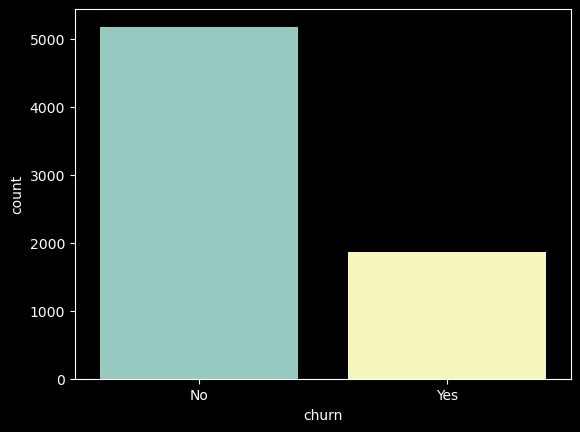

In [57]:
# how often do customers churn?

sns.countplot(data=df, x="churn", hue="churn")

In [58]:
customer_churn_percent = round((df.churn == 'Yes').mean() * 100)
customer_not_churn_percent = round(100 - customer_churn_percent)

print(f"Percentage of churn: {customer_churn_percent}%")
print(sep_line)
print(f"Percentage of NOT churn: {customer_not_churn_percent}%")

Percentage of churn: 27%
Percentage of NOT churn: 73%


# Column breakdown

In [59]:
customer_info = ["gender", "senior_citizen", "partner", "dependants"]
account_info = [
    "tenure",
    "contract_type",
    "paperless_billing",
    "payment_type",
    "monthly_charges",
]
service_info = [
    "phone_service",
    "multipul_lines",
    "internet_service_type",
    "online_backup",
    "online_security",
    "device_protection",
    "tech_support",
    "streaming_TV",
    "streaming_movies",
]

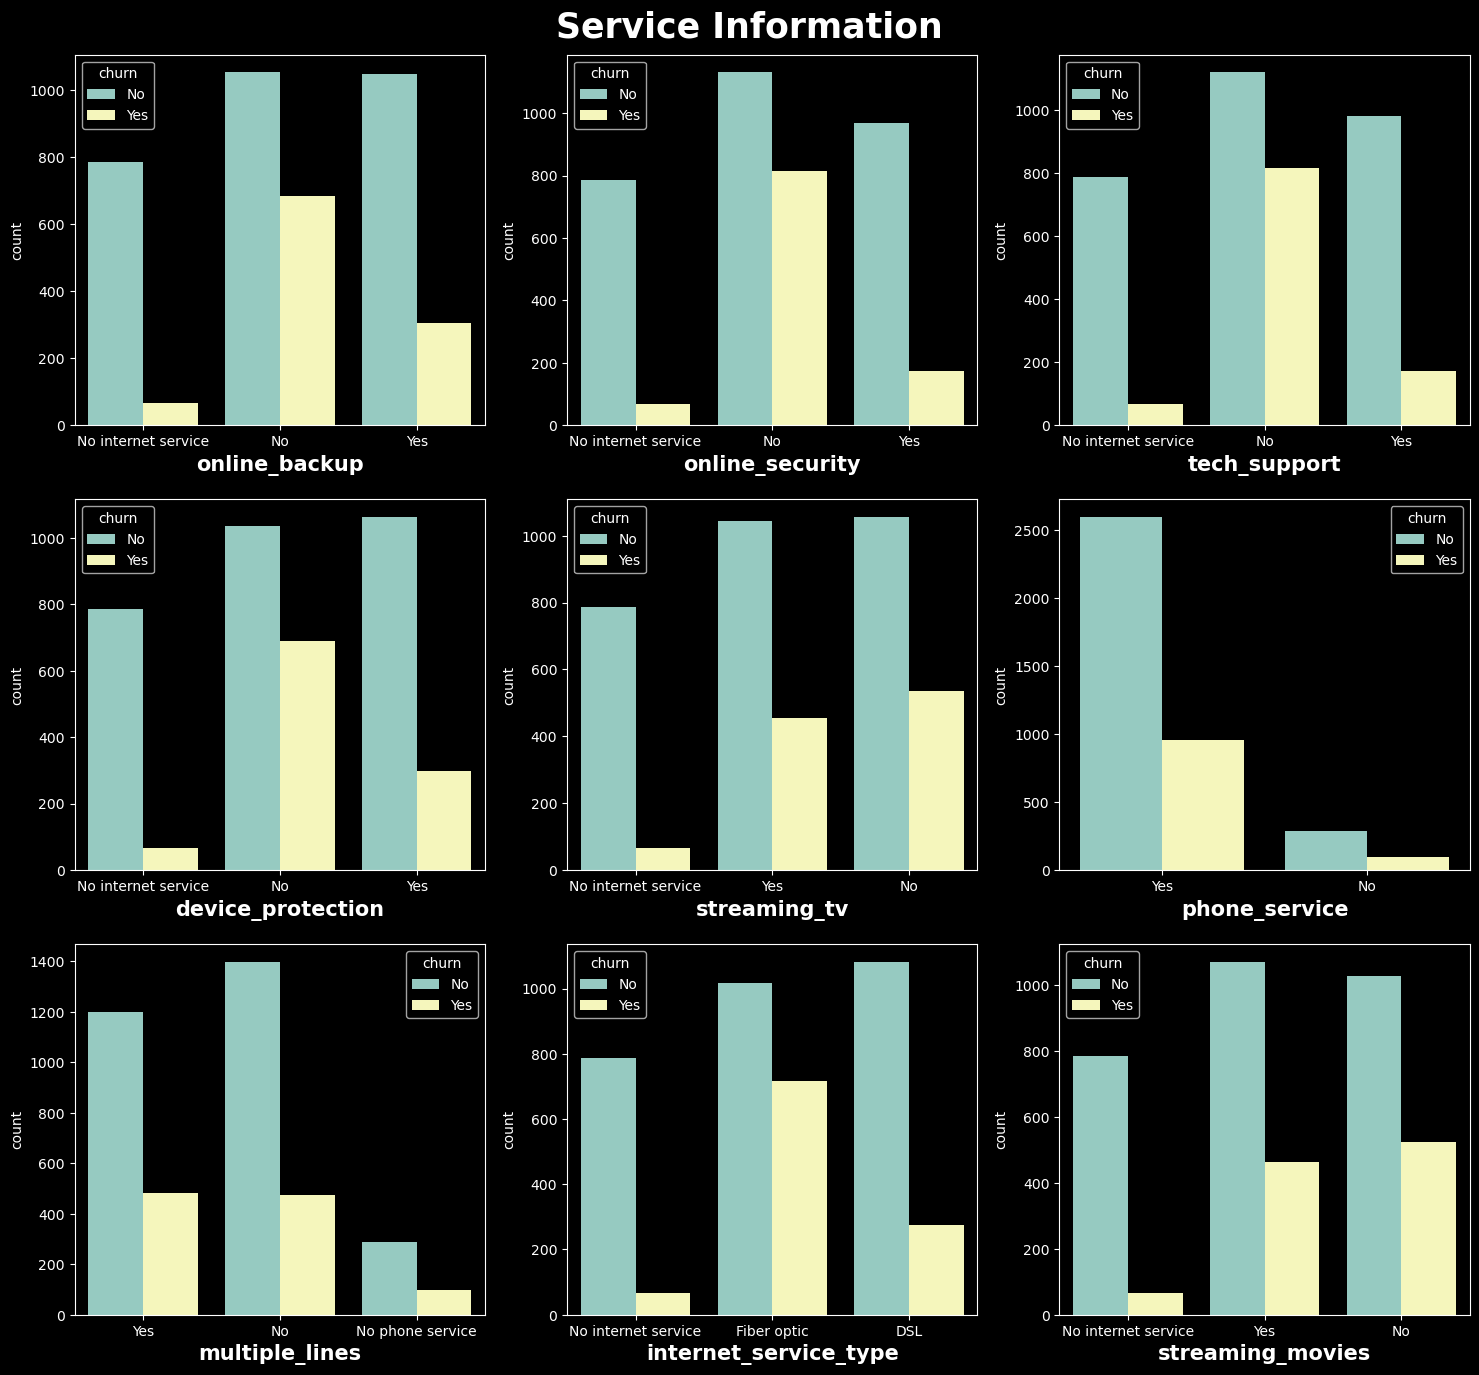

In [60]:
# define plotting region (3 rows, 3 columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))

# create boxplot in each subplot
sns.countplot(data=train, hue="churn", x="online_backup", ax=axes[0, 0])
axes[0, 0].set_xlabel("online_backup", fontweight="bold", size="15")

sns.countplot(data=train, hue="churn", x="online_security", ax=axes[0, 1])
axes[0, 1].set_xlabel("online_security", fontweight="bold", size="15")

sns.countplot(data=train, hue="churn", x="tech_support", ax=axes[0, 2])
axes[0, 2].set_xlabel("tech_support", fontweight="bold", size="15")

sns.countplot(data=train, hue="churn", x="device_protection", ax=axes[1, 0])
axes[1, 0].set_xlabel("device_protection", fontweight="bold", size="15")

sns.countplot(data=train, hue="churn", x="streaming_tv", ax=axes[1, 1])
axes[1, 1].set_xlabel("streaming_tv", fontweight="bold", size="15")

sns.countplot(data=train, hue="churn", x="phone_service", ax=axes[1, 2])
axes[1, 2].set_xlabel("phone_service", fontweight="bold", size="15")

sns.countplot(data=train, hue="churn", x="multiple_lines", ax=axes[2, 0])
axes[2, 0].set_xlabel("multiple_lines", fontweight="bold", size="15")

sns.countplot(data=train, hue="churn", x="internet_service_type", ax=axes[2, 1])
axes[2, 1].set_xlabel("internet_service_type", fontweight="bold", size="15")

sns.countplot(data=train, hue="churn", x="streaming_movies", ax=axes[2, 2])
axes[2, 2].set_xlabel("streaming_movies", fontweight="bold", size="15")

# Create subtitle for
fig.suptitle("Service Information", fontweight="bold", size=25)
plt.subplots_adjust(top=0.95)
plt.show()

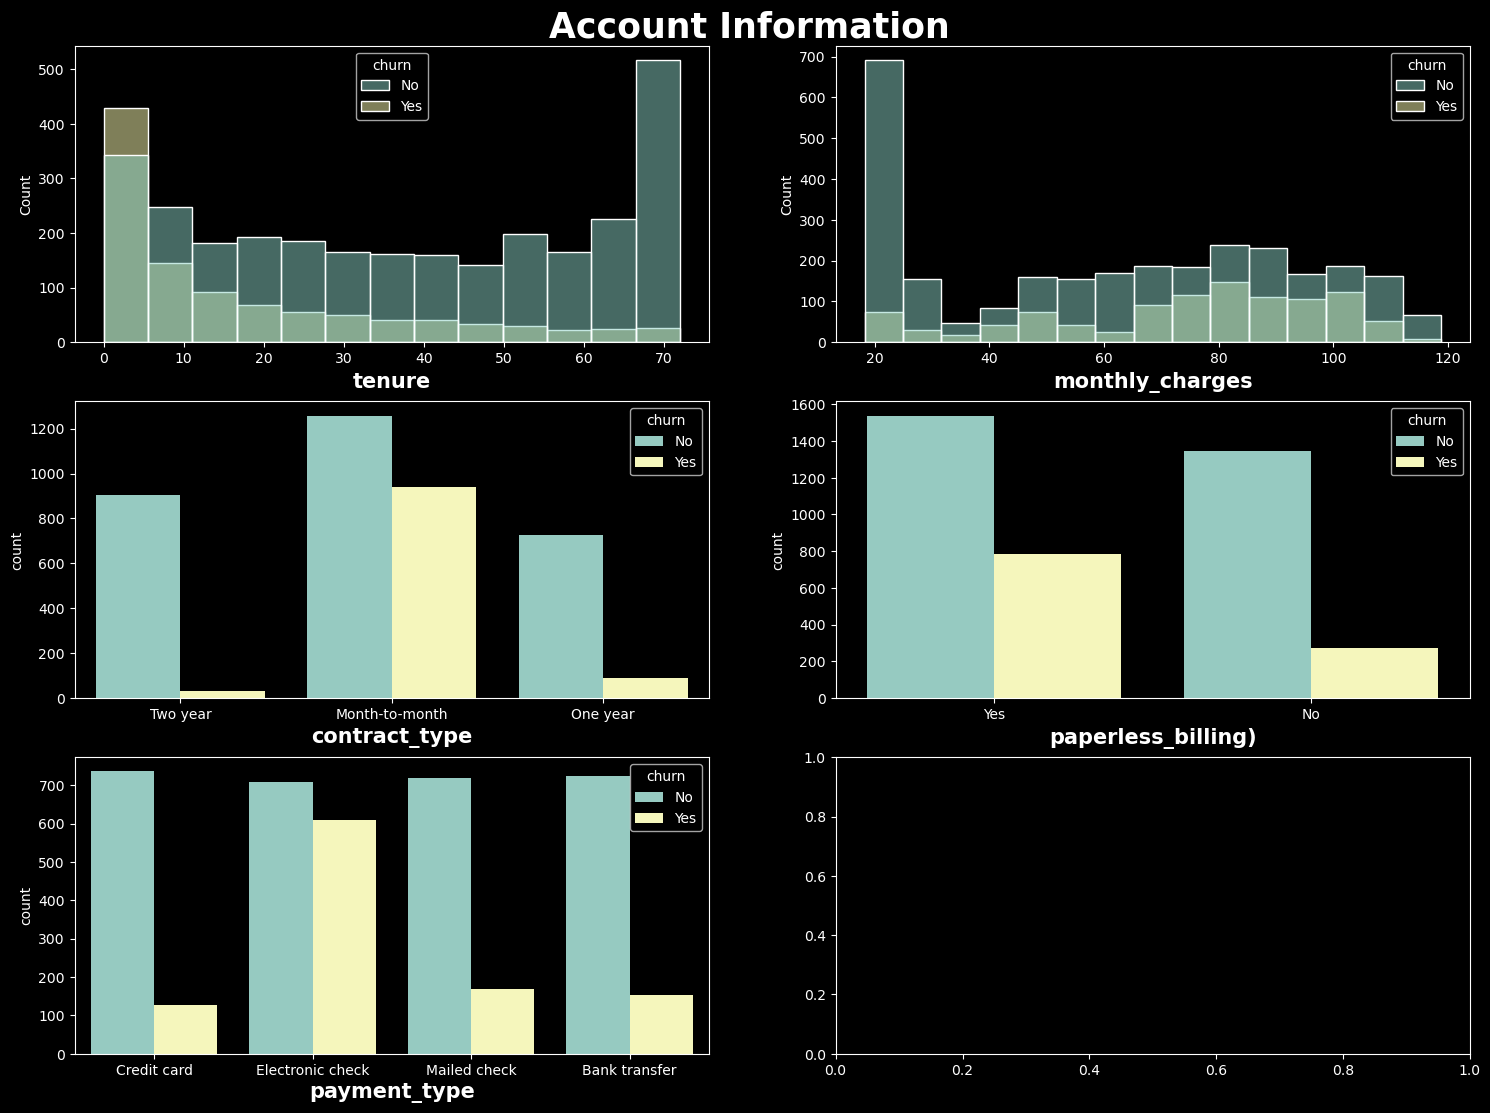

In [61]:
# define plotting region (3 rows, 3 columns)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))

# create boxplot in each subplot
sns.histplot(data=train, hue="churn", x="tenure", ax=axes[0, 0])
axes[0, 0].set_xlabel("tenure", fontweight="bold", size="15")

sns.histplot(data=train, hue="churn", x="monthly_charges", ax=axes[0, 1])
axes[0, 1].set_xlabel("monthly_charges", fontweight="bold", size="15")

sns.countplot(data=train, hue="churn", x="contract_type", ax=axes[1, 0])
axes[1, 0].set_xlabel("contract_type", fontweight="bold", size="15")

sns.countplot(data=train, hue="churn", x="paperless_billing", ax=axes[1, 1])
axes[1, 1].set_xlabel("paperless_billing)", fontweight="bold", size="15")

sns.countplot(data=train, hue="churn", x="payment_type", ax=axes[2, 0])
axes[2, 0].set_xlabel("payment_type", fontweight="bold", size="15")


fig.suptitle("Account Information", fontweight="bold", size=25)
plt.subplots_adjust(top=0.95)
plt.show()

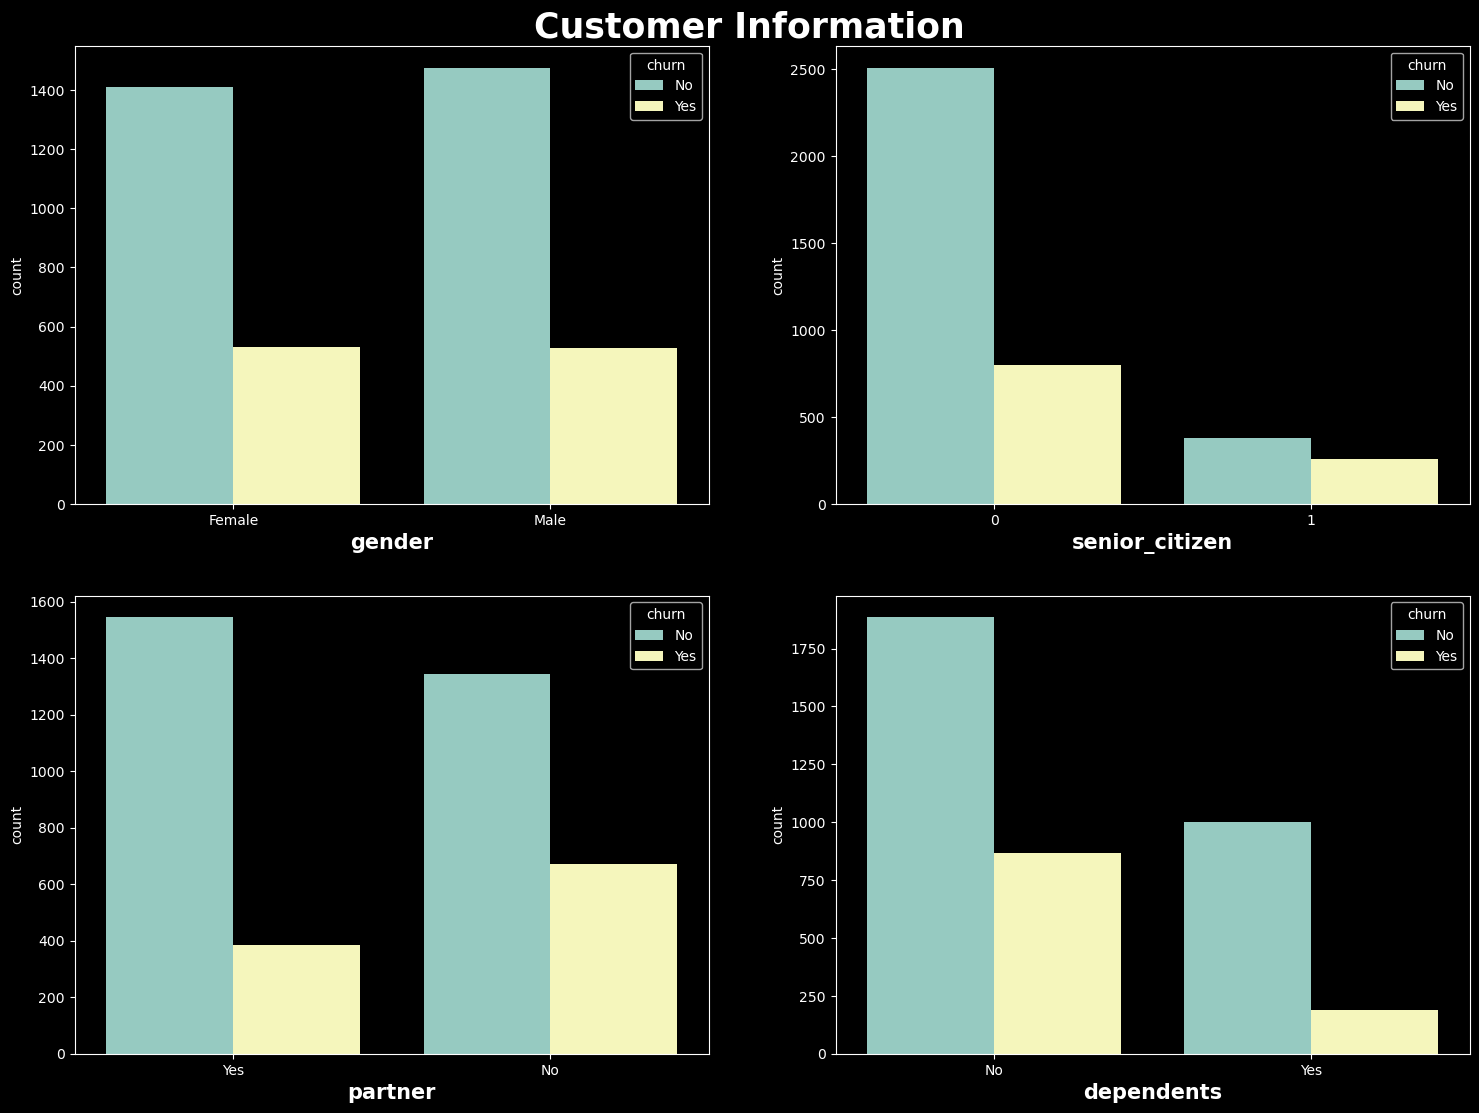

In [62]:
# define plotting region (3 rows, 3 columns)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))

#create boxplot in each subplot
sns.countplot(data=train, hue='churn', x='gender', ax=axes[0,0])
axes[0,0].set_xlabel("gender", fontweight="bold", size="15")

sns.countplot(data=train, hue='churn', x='senior_citizen', ax=axes[0,1])
axes[0,1].set_xlabel("senior_citizen", fontweight="bold", size="15")

sns.countplot(data=train, hue='churn', x='partner', ax=axes[1,0])
axes[1,0].set_xlabel("partner", fontweight="bold", size="15")

sns.countplot(data=train, hue='churn', x='dependents', ax=axes[1,1])
axes[1,1].set_xlabel("dependents", fontweight="bold", size="15")


fig.suptitle('Customer Information', fontweight='bold', size=25)
plt.subplots_adjust(top=0.95)
plt.show()

# Do monthy charges impact churn 

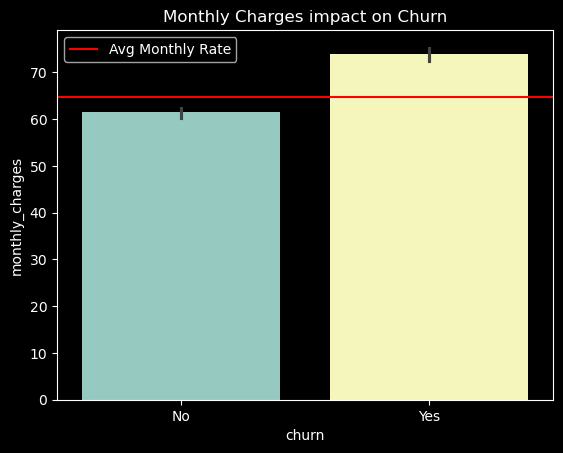

In [63]:
# create a bar plot with x -> churn and y -> monlthy charges
sns.barplot(x='churn', y='monthly_charges', hue="churn", data=train)

# create a variable to hold the avg monthy rate
avg_monthly_rate = train.monthly_charges.mean()
# plot the avg monthly rate 
plt.axhline(avg_monthly_rate, label='Avg Monthly Rate', color="red")
# add a legend to lable the avg monthly rate 
plt.legend(loc='upper left')
# create a title for the graph (barplot)
plt.title('Monthly Charges impact on Churn')
plt.show()

- looking at this graph it seems that monthly charges do not have a significant impact on churn ^

In [64]:
# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05
null_hypothesis = "monthly charges and churn of ticket are independent"
alternative_hypothesis = "there is a relationship between churn and monthly charges"

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train.churn, train.monthly_charges)
observed

monthly_charges,18.25,18.40,18.70,18.80,18.85,18.90,18.95,19.00,19.05,19.10,...,116.55,116.60,116.80,117.15,117.45,117.60,118.35,118.60,118.65,118.75
churn,,,,,,,,,,,,,,,,,,,,,
No,1,1,2,4,3,1,2,3,9,6,...,1,1,1,1,0,1,0,2,1,1
Yes,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0


In [65]:

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p

Reject the null hypothesis that monthly charges and churn of ticket are independent
Sufficient evidence to move forward understanding that there is a relationship between churn and monthly charges


2.0741791404838624e-08

- There does seem to be a ralationship between monthly charges and churn ^ 

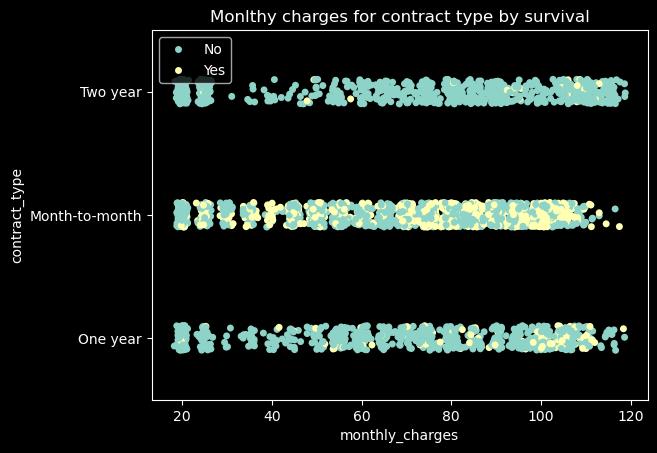

In [66]:
 # does this change based on contract type? 
 
 sns.stripplot(
    data=train,
    y='contract_type',
x='monthly_charges',
hue='churn')
plt.title('Monlthy charges for contract type by survival')
plt.legend(loc='upper left')
plt.show()

# wanted to see of there is any significat difference in monthy price between the contract types 

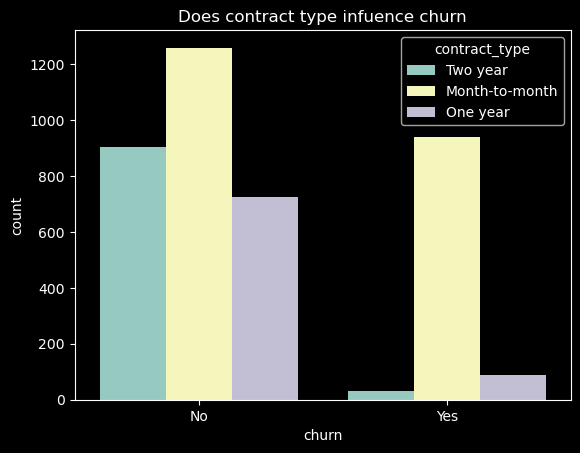

In [67]:
# does contract type infuance churn 

sns.countplot(data = train, x= 'churn', hue = 'contract_type')
plt.title('Does contract type infuence churn')
plt.show()

- customers with month to month contracts churn the most out of all contract types ^ 

In [68]:
# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05
null_hypothesis = "contract type and churn of ticket are independent"
alternative_hypothesis = "there is a relationship between churn and contract type"

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train.churn, train.contract_type)
observed


contract_type,Month-to-month,One year,Two year
churn,,,
No,1258,726,903
Yes,939,87,30


In [69]:

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p

Reject the null hypothesis that contract type and churn of ticket are independent
Sufficient evidence to move forward understanding that there is a relationship between churn and contract type


2.400667548360686e-143

- confirmed relationship between contract type and churn 

In [70]:
'''

def chi_squared(null, alt, train_index, train_cols):
    alpha = 0.05
    observed = pd.crosstab(train_index, train_cols)
    display(observed)
    if p < alpha:
        print("Reject the null hypothesis that", null)
        print("Sufficient evidence to move forward understanding that", alt)
    else:
        print("Fail to reject the null")
        print("Insufficient evidence to reject the null")
    
    print(f'{p = }')

    '''

'\n\ndef chi_squared(null, alt, train_index, train_cols):\n    alpha = 0.05\n    observed = pd.crosstab(train_index, train_cols)\n    display(observed)\n    if p < alpha:\n        print("Reject the null hypothesis that", null)\n        print("Sufficient evidence to move forward understanding that", alt)\n    else:\n        print("Fail to reject the null")\n        print("Insufficient evidence to reject the null")\n    \n    print(f\'{p = }\')\n\n    '

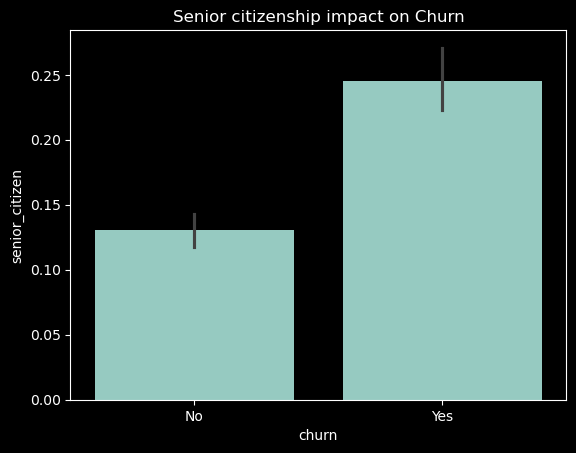

In [71]:
# Does being a senior citizen impact churn? 

sns.barplot(x='churn', y='senior_citizen', data=train)

plt.title('Senior citizenship impact on Churn')
plt.show()

In [72]:
# Categorical vs Categorical so a chi squared test 

alpha = 0.05
null_hypothesis = "senior citizenship and churn are independent"
alternative_hypothesis = "there is a relationship between senior citizenship and churn"

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train.churn, train.senior_citizen)
observed


senior_citizen,0,1
churn,,
No,2509,378
Yes,797,259


In [73]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p

Reject the null hypothesis that senior citizenship and churn are independent
Sufficient evidence to move forward understanding that there is a relationship between senior citizenship and churn


8.750772211204321e-18

- confirmed that there is a relationship between senior citizenship and churn 

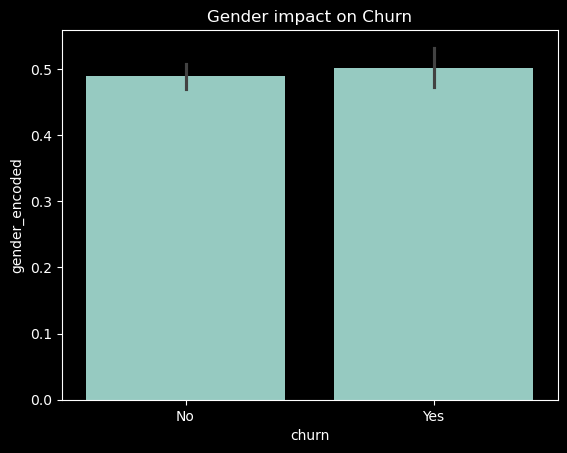

In [74]:
# Does gender impact churn? 

sns.barplot(x='churn', y='gender_encoded', data=train)

plt.title('Gender impact on Churn')
plt.show()

In [75]:
null = "gender and churn are independent"
alt = "there is a relationship between churn and gender"

chi_squared(null, alt, train.churn, train.gender_encoded)

NameError: name 'chi_squared' is not defined

## Fail to reject the null ^

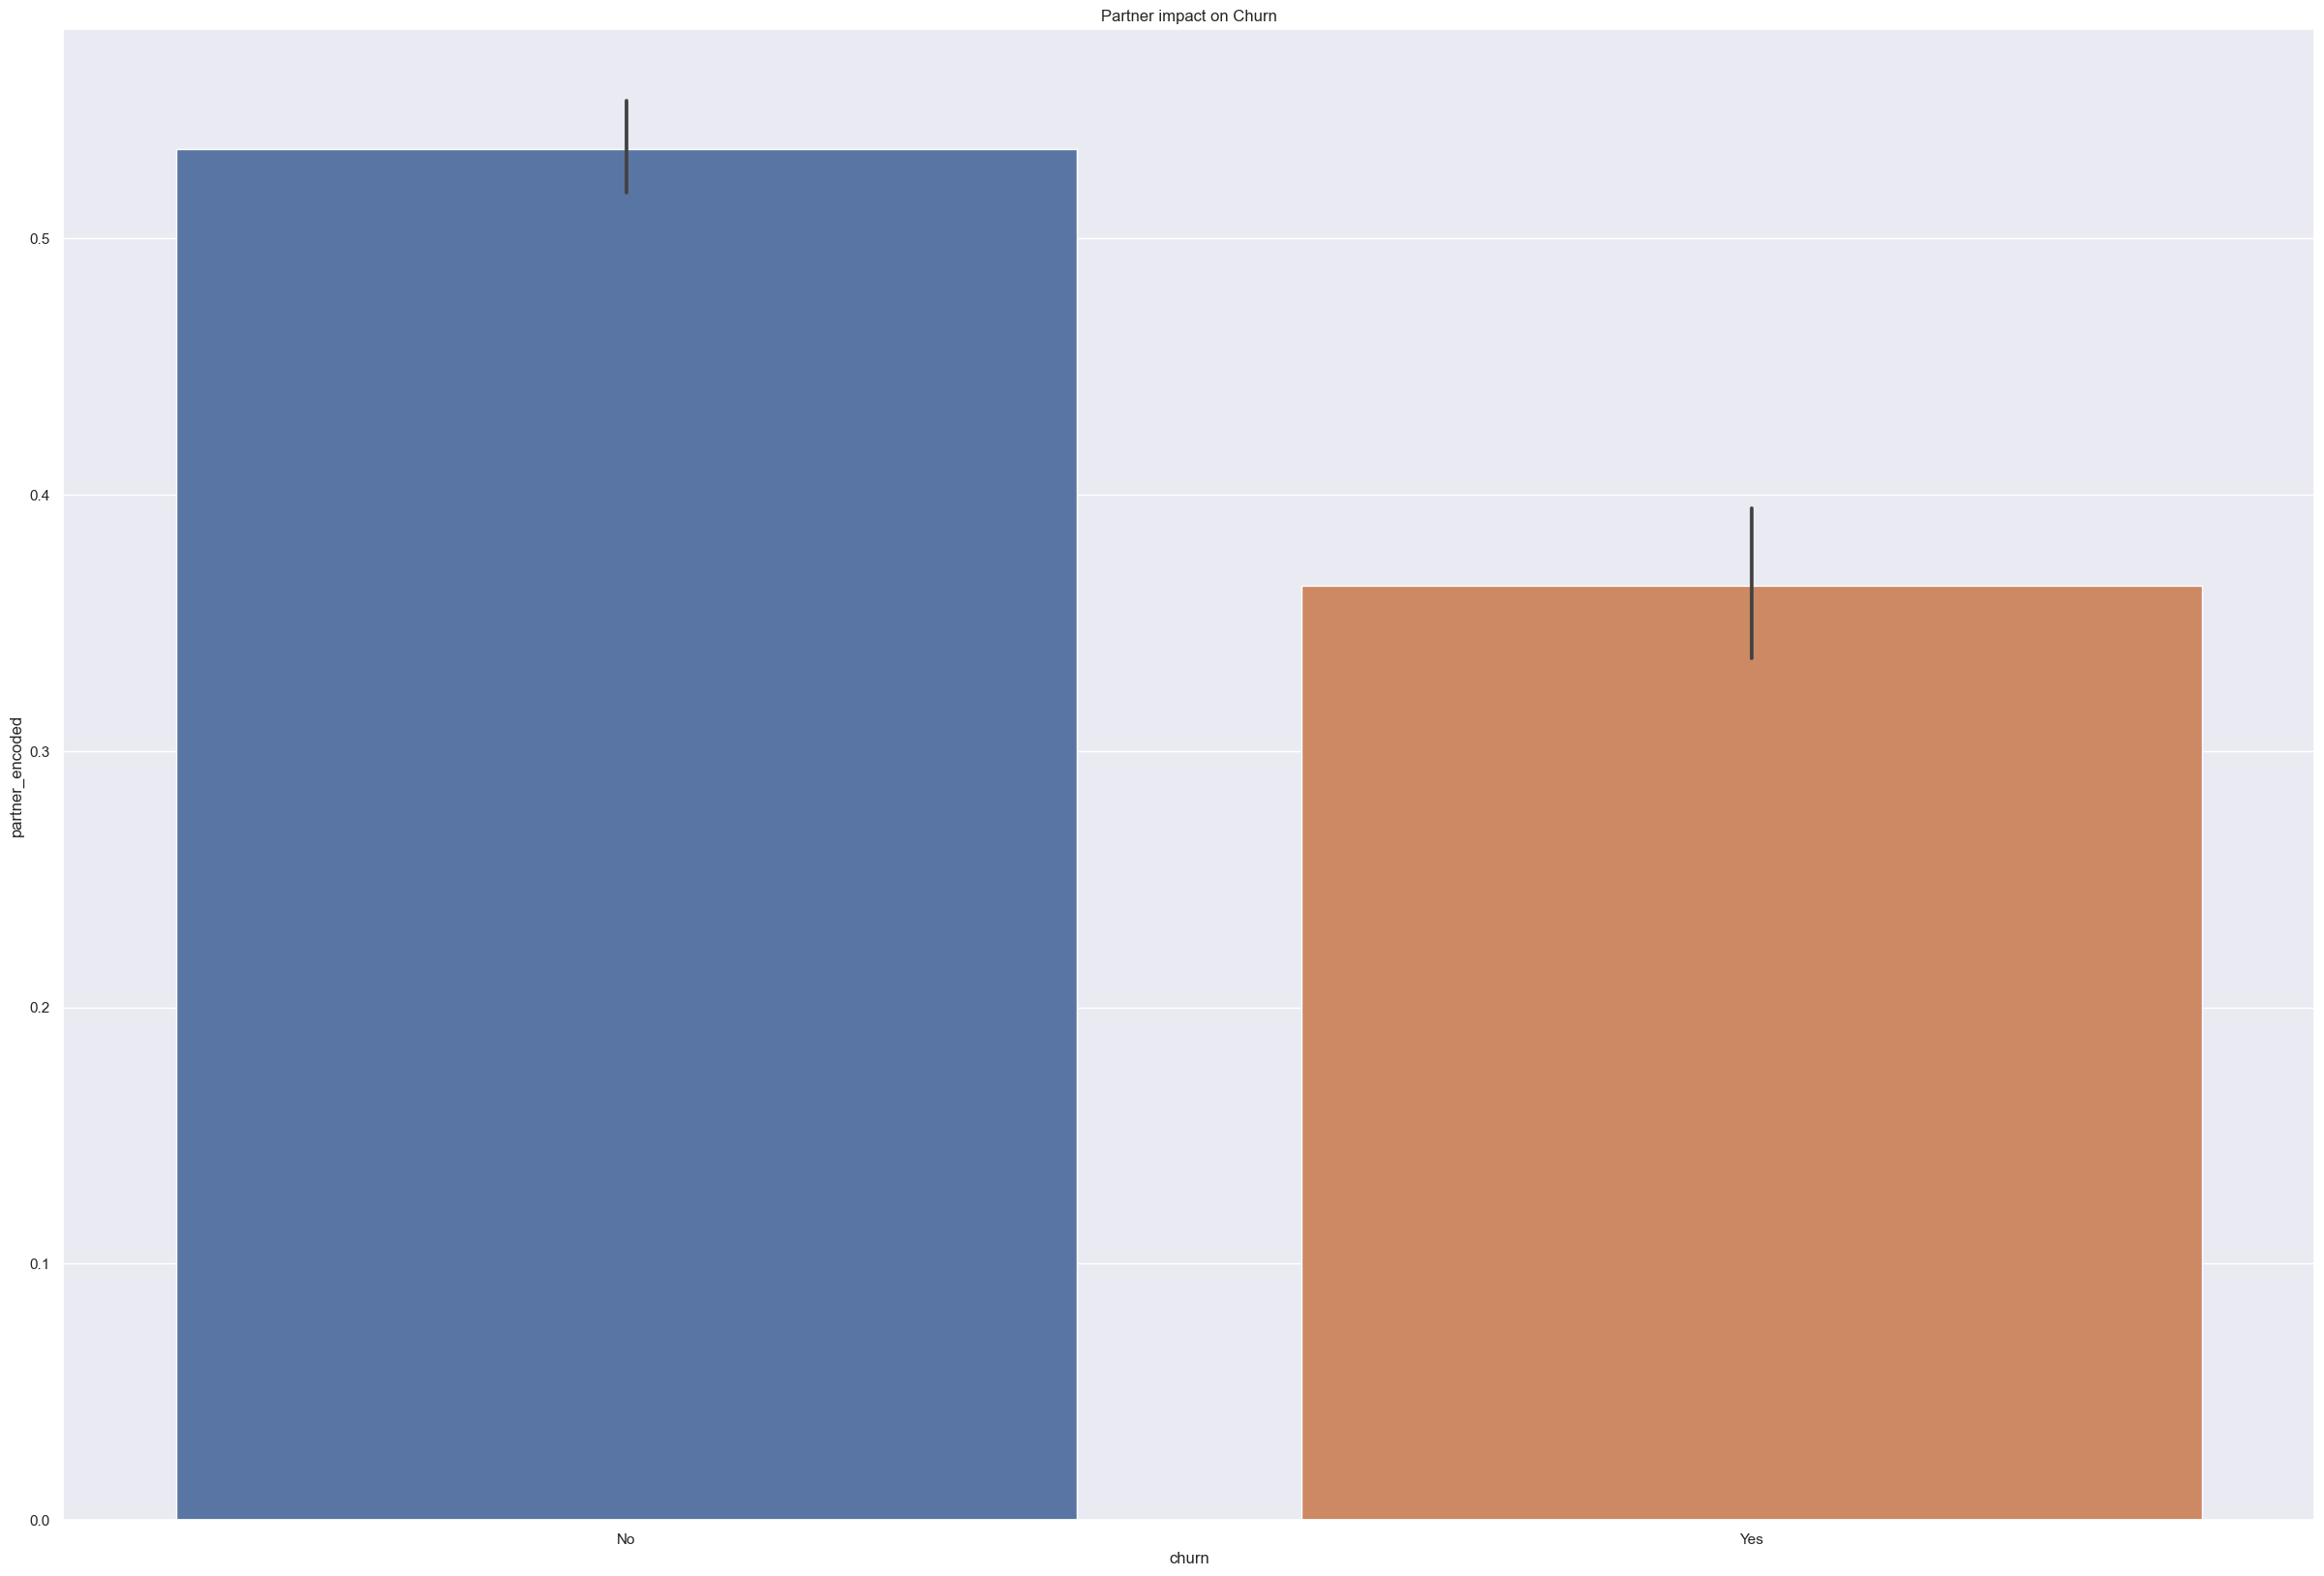

In [ ]:
# Does having a partner impact churn? 

sns.barplot(x='churn', y='partner_encoded', data=train)

plt.title('Partner impact on Churn')
plt.show()

In [ ]:
null = "partner and churn are independent"
alt = "there is a relationship between churn and partner"

chi_squared(null, alt, train.churn, train.partner_encoded)

partner_encoded,0,1
churn,,
No,1343,1544
Yes,671,385


Reject the null hypothesis that partner and churn are independent
Sufficient evidence to move forward understanding that there is a relationship between churn and partner
 
p = 3.98458278968675e-21


## there is a relationship ^

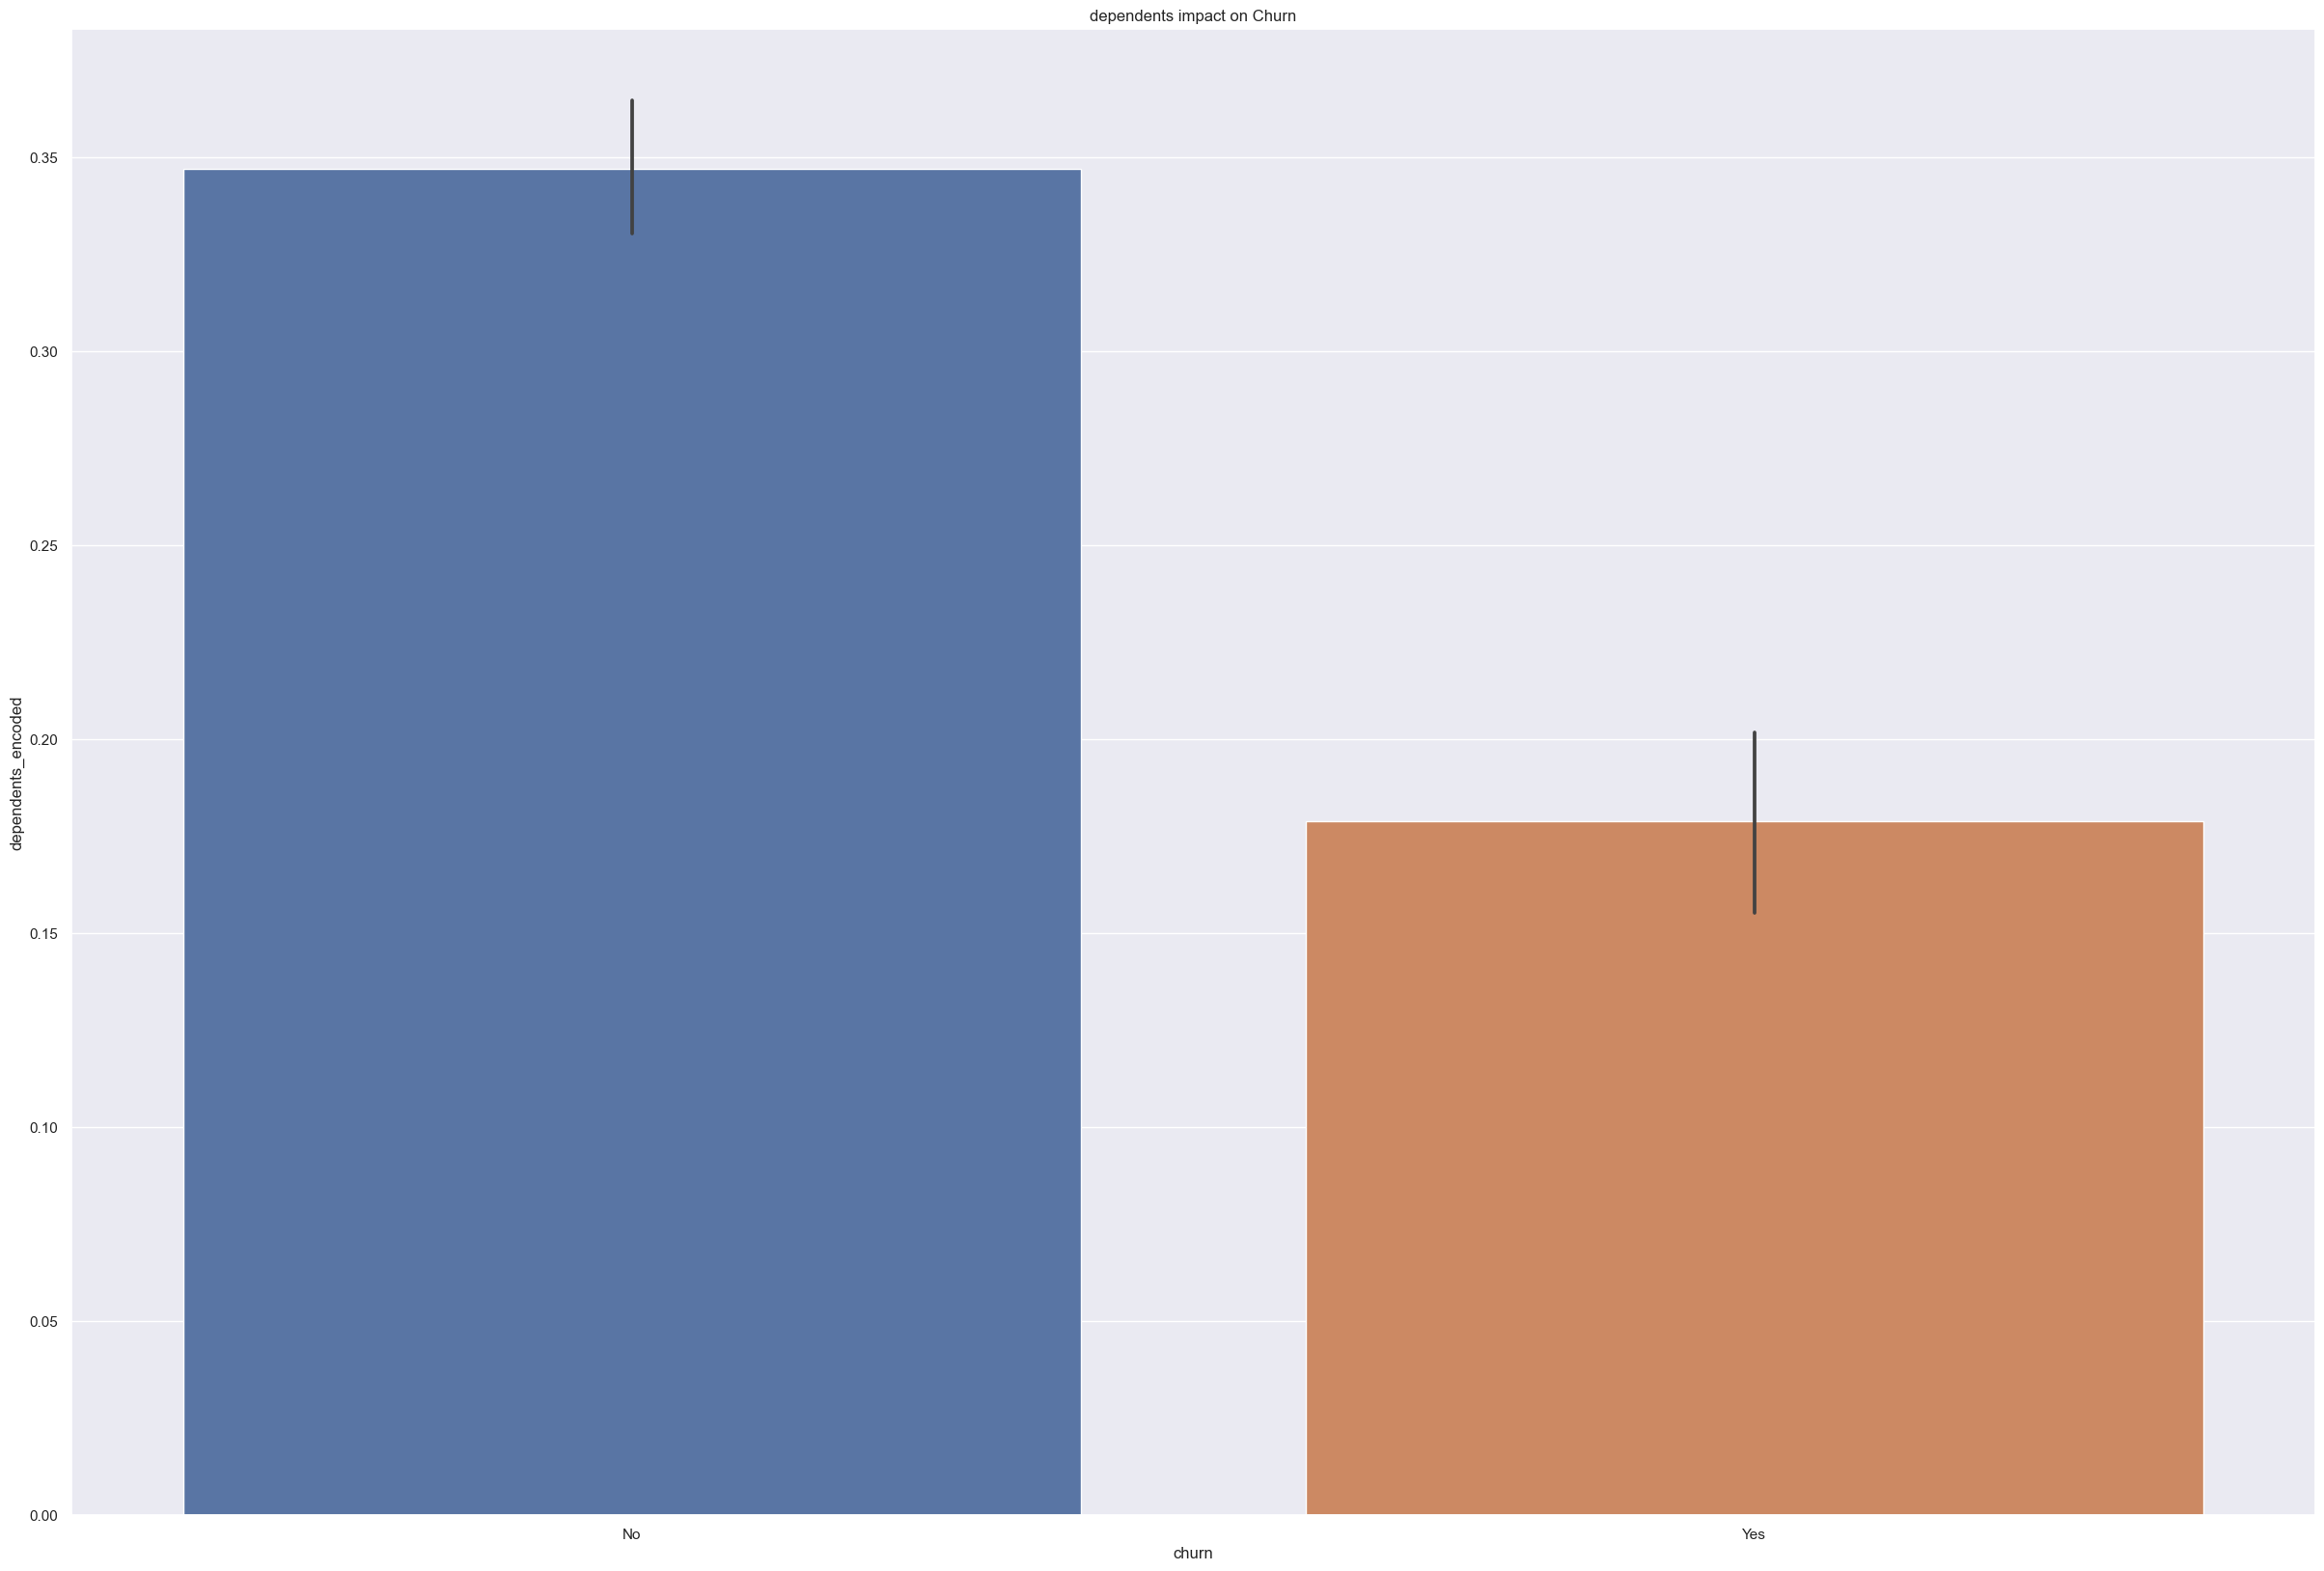

In [ ]:
# Does having dependents impact churn? 

sns.barplot(x='churn', y='dependents_encoded', data=train)

plt.title('dependents impact on Churn')
plt.show()

In [ ]:
null = "dependants and churn are independent"
alt = "there is a relationship between churn and dependants"

chi_squared(null, alt, train.churn, train.dependents_encoded)

dependents_encoded,0,1
churn,,
No,1885,1002
Yes,867,189


Reject the null hypothesis that dependants and churn are independent
Sufficient evidence to move forward understanding that there is a relationship between churn and dependants
 
p = 3.641625016694931e-24


## there is a relationship ^

In [ ]:
['Contract', 'PaperlessBilling', 'PaymentMethod']

['Contract', 'PaperlessBilling', 'PaymentMethod']

<Axes: xlabel='paperless_billing', ylabel='count'>

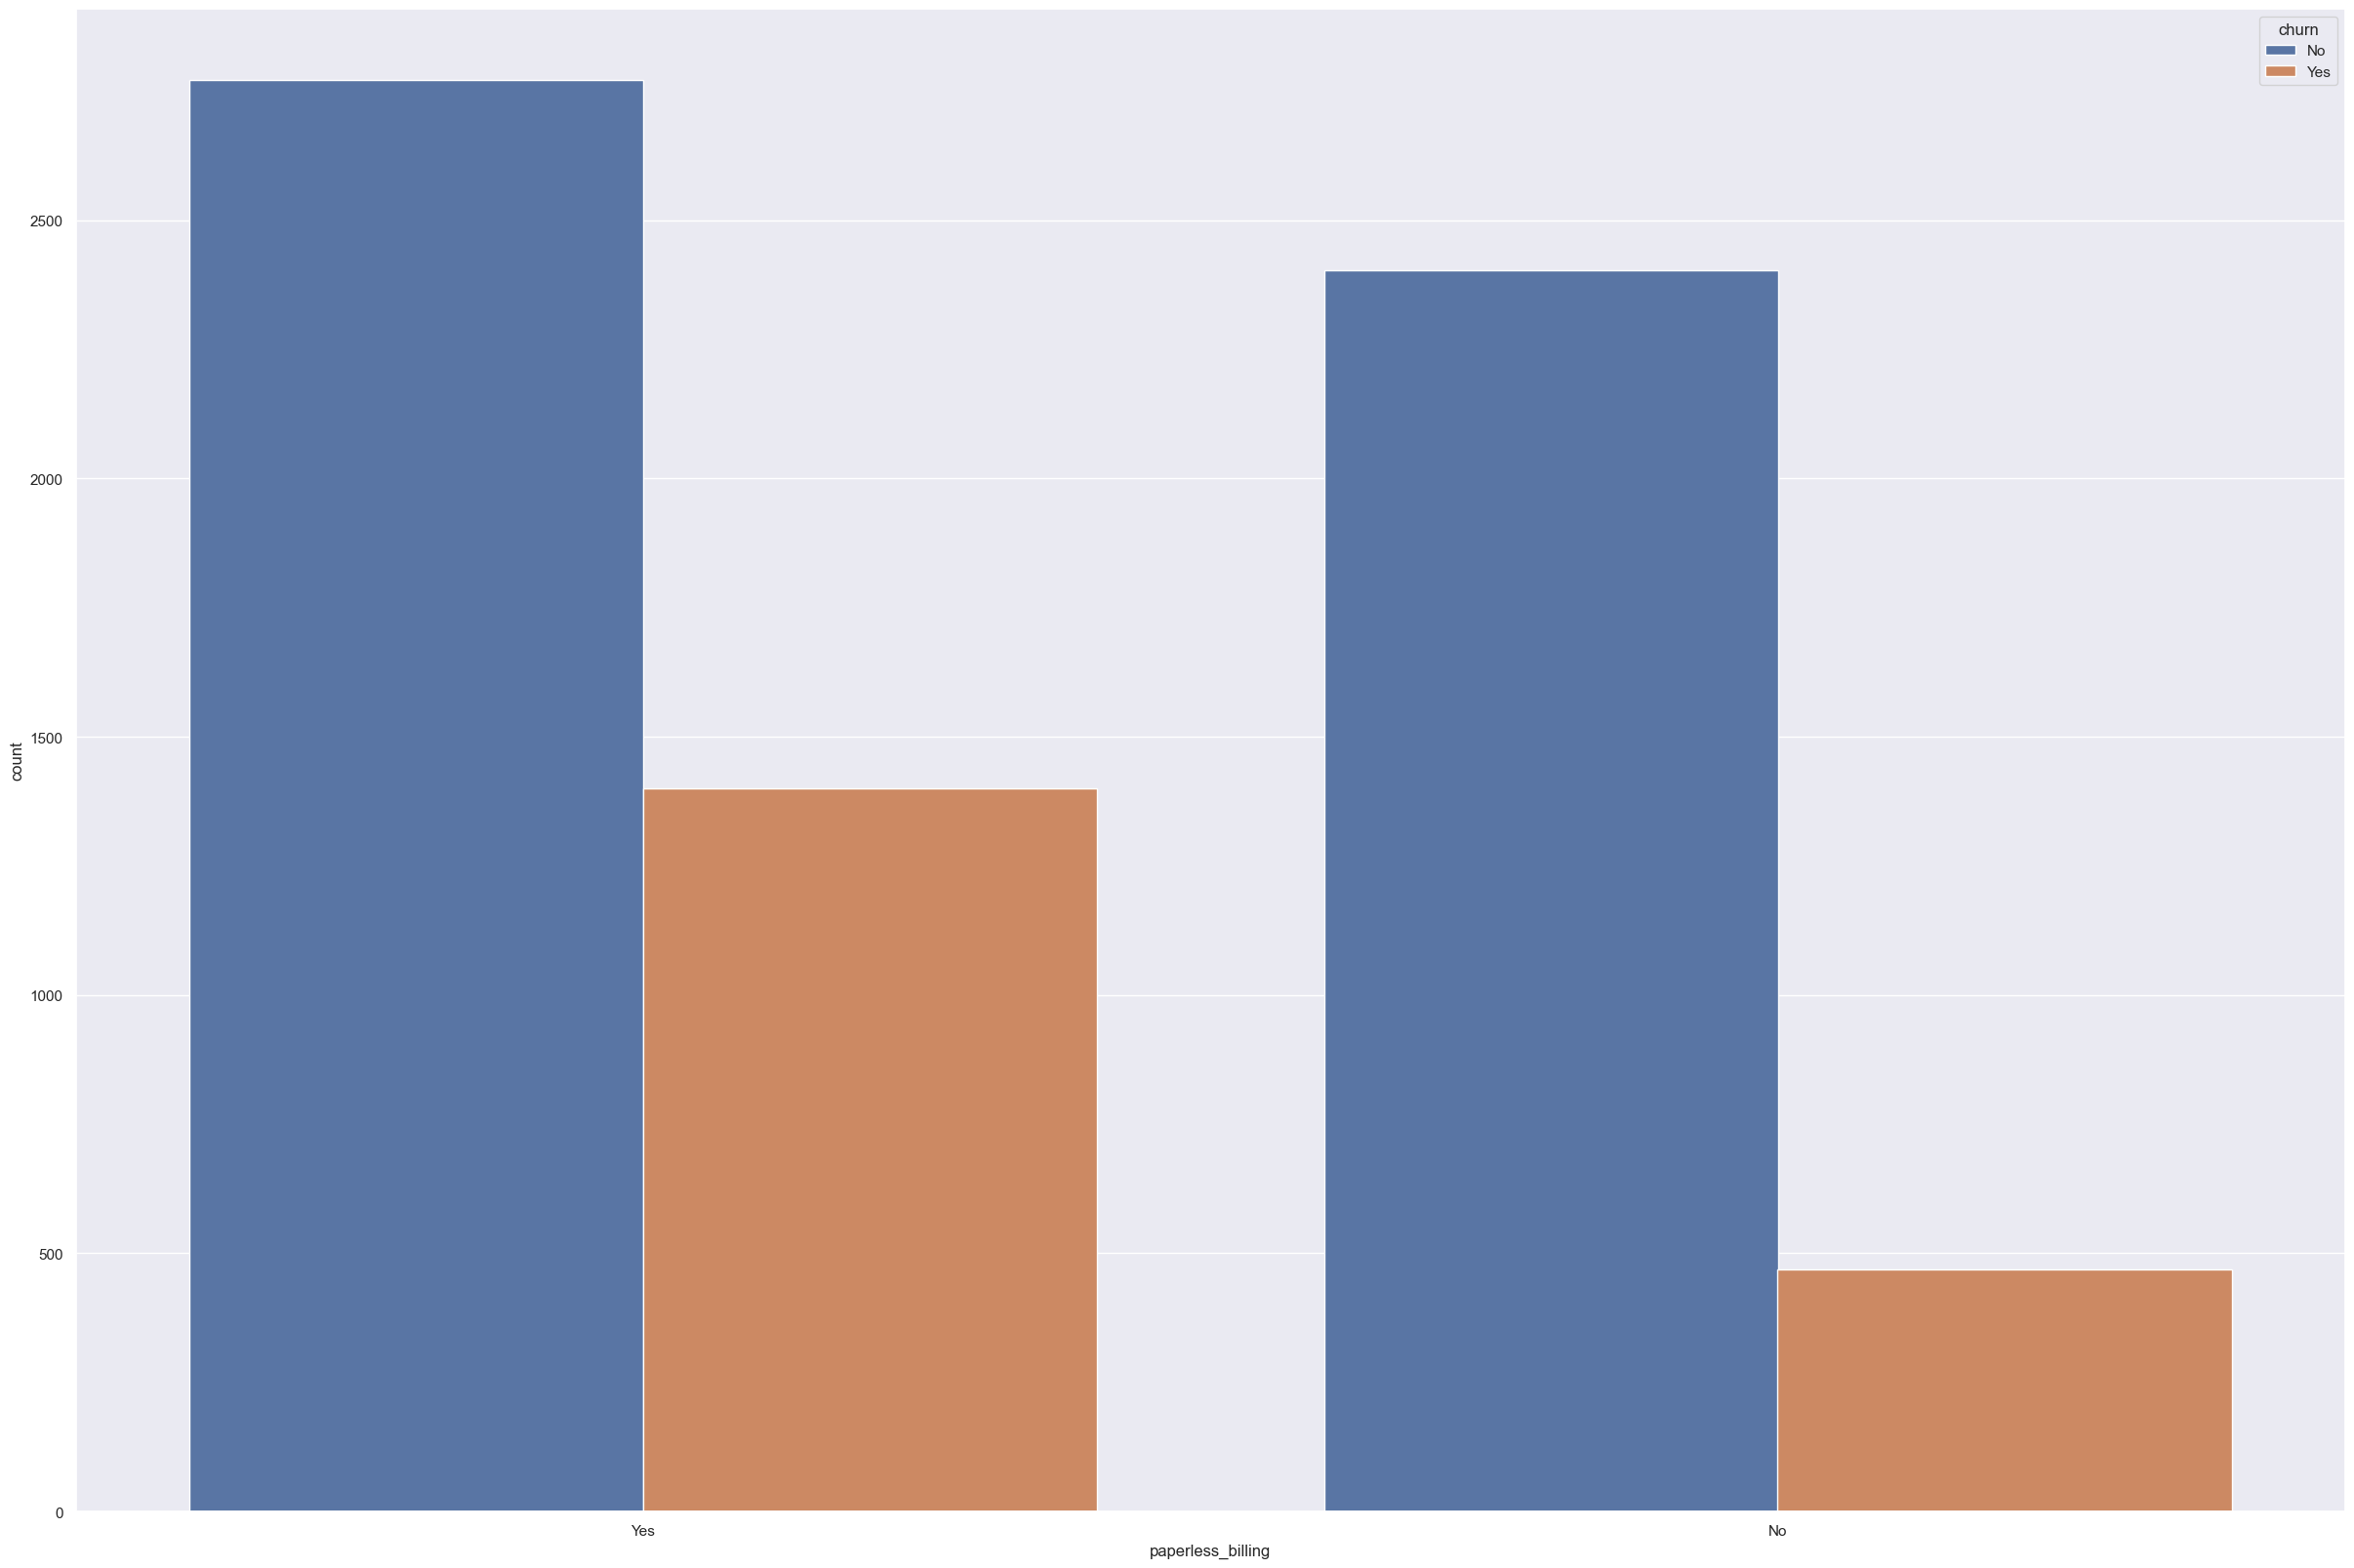

In [ ]:
sns.countplot(data=df, x='paperless_billing', hue='churn')

In [ ]:
null = 'paperless billing and churn are independent' 
alt = 'there is a relationship between churn and paperless billing'

chi_squared(null, alt, train.churn, train.paperless_billing)

paperless_billing,No,Yes
churn,,
No,1348,1539
Yes,273,783


Reject the null hypothesis that paperless billing and churn are independent
Sufficient evidence to move forward understanding that there is a relationship between churn and paperless billing
 
p = 7.893629105635388e-32


## there is a relationship ^ 

<Axes: xlabel='payment_type', ylabel='count'>

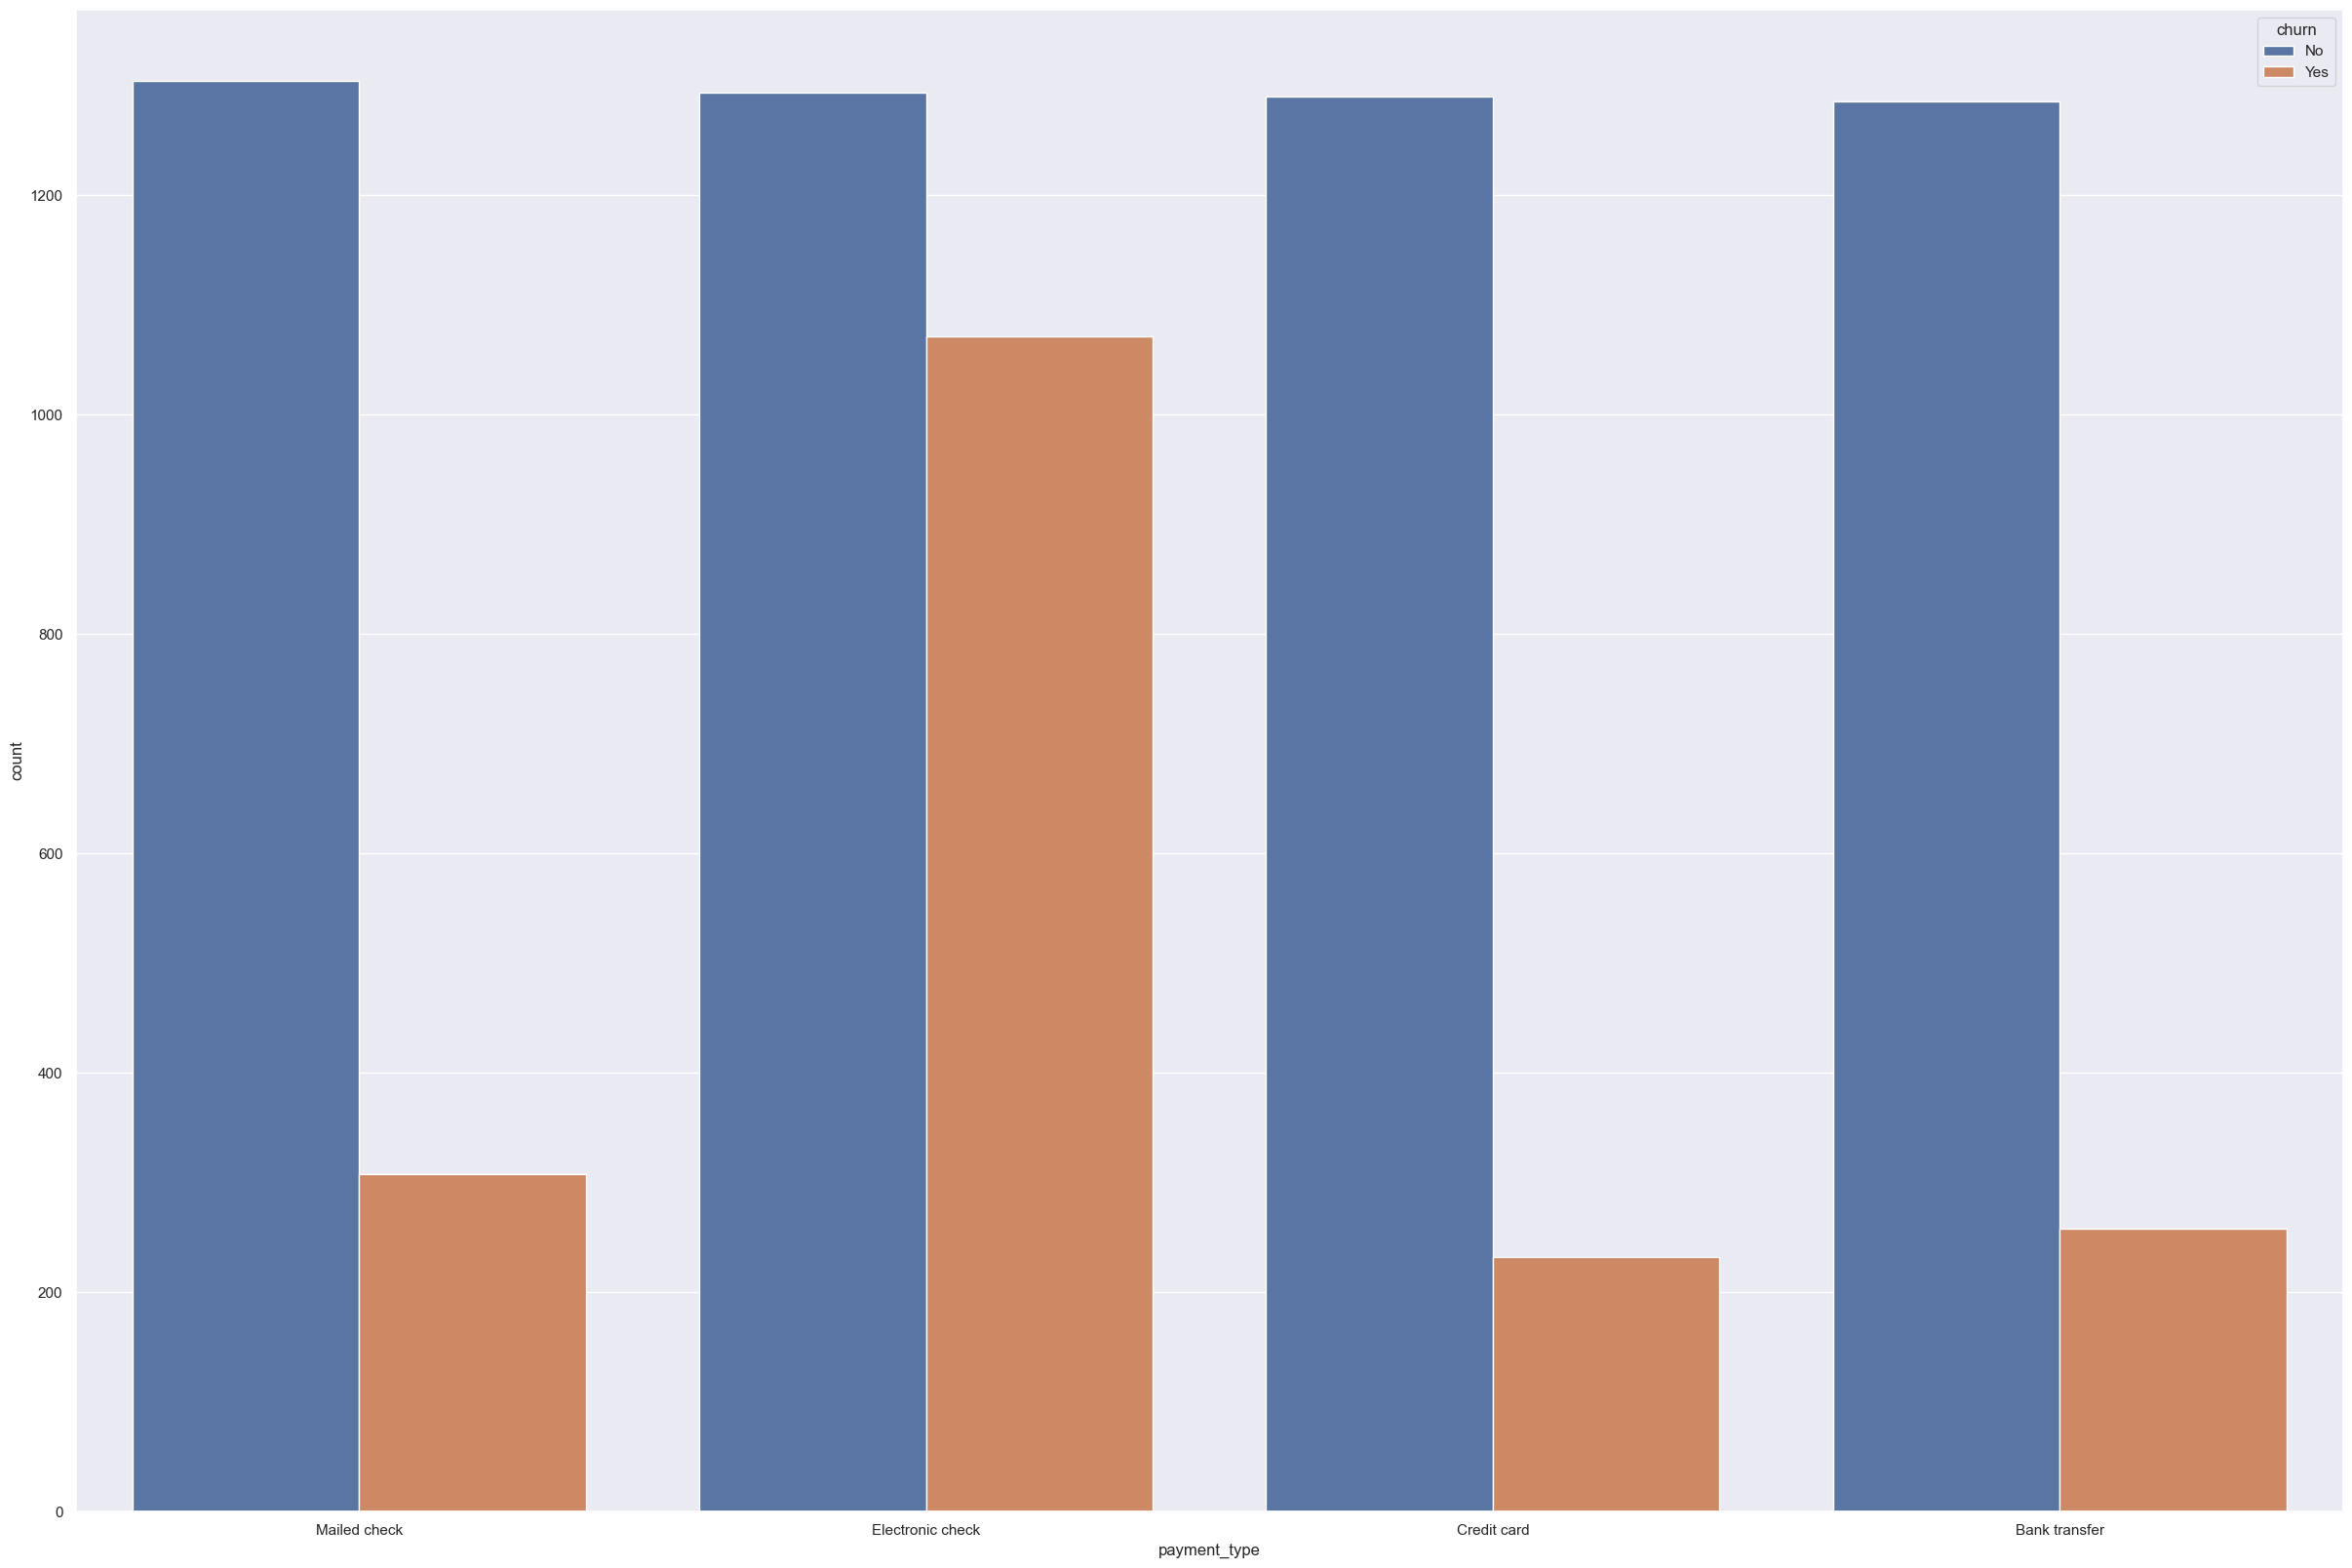

In [ ]:
sns.countplot(data=df, x='payment_type', hue='churn')

In [ ]:
null = 'payment type and churn are independent' 
alt = 'there is a relationship between churn and payment type'

chi_squared(null, alt, train.churn, train.payment_type)

payment_type,Bank transfer,Credit card,Electronic check,Mailed check
churn,,,,
No,723,736,708,720
Yes,152,128,608,168


Reject the null hypothesis that payment type and churn are independent
Sufficient evidence to move forward understanding that there is a relationship between churn and payment type
 
p = 7.570194664311438e-83


## there is a realtionship ^

In [ ]:
['tenure', 'MonthlyCharges', 'TotalCharges']

['tenure', 'MonthlyCharges', 'TotalCharges']

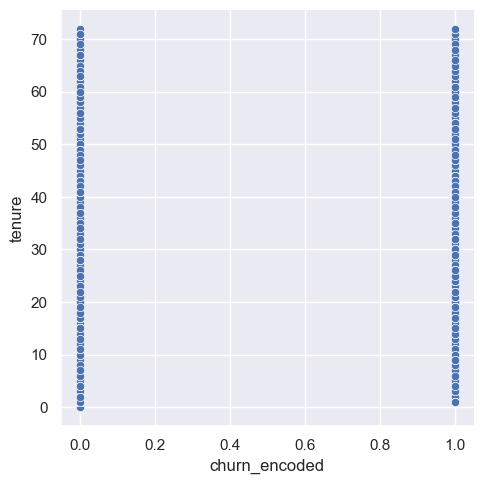

In [ ]:
sns.relplot(data=df, y='tenure', x='churn_encoded')

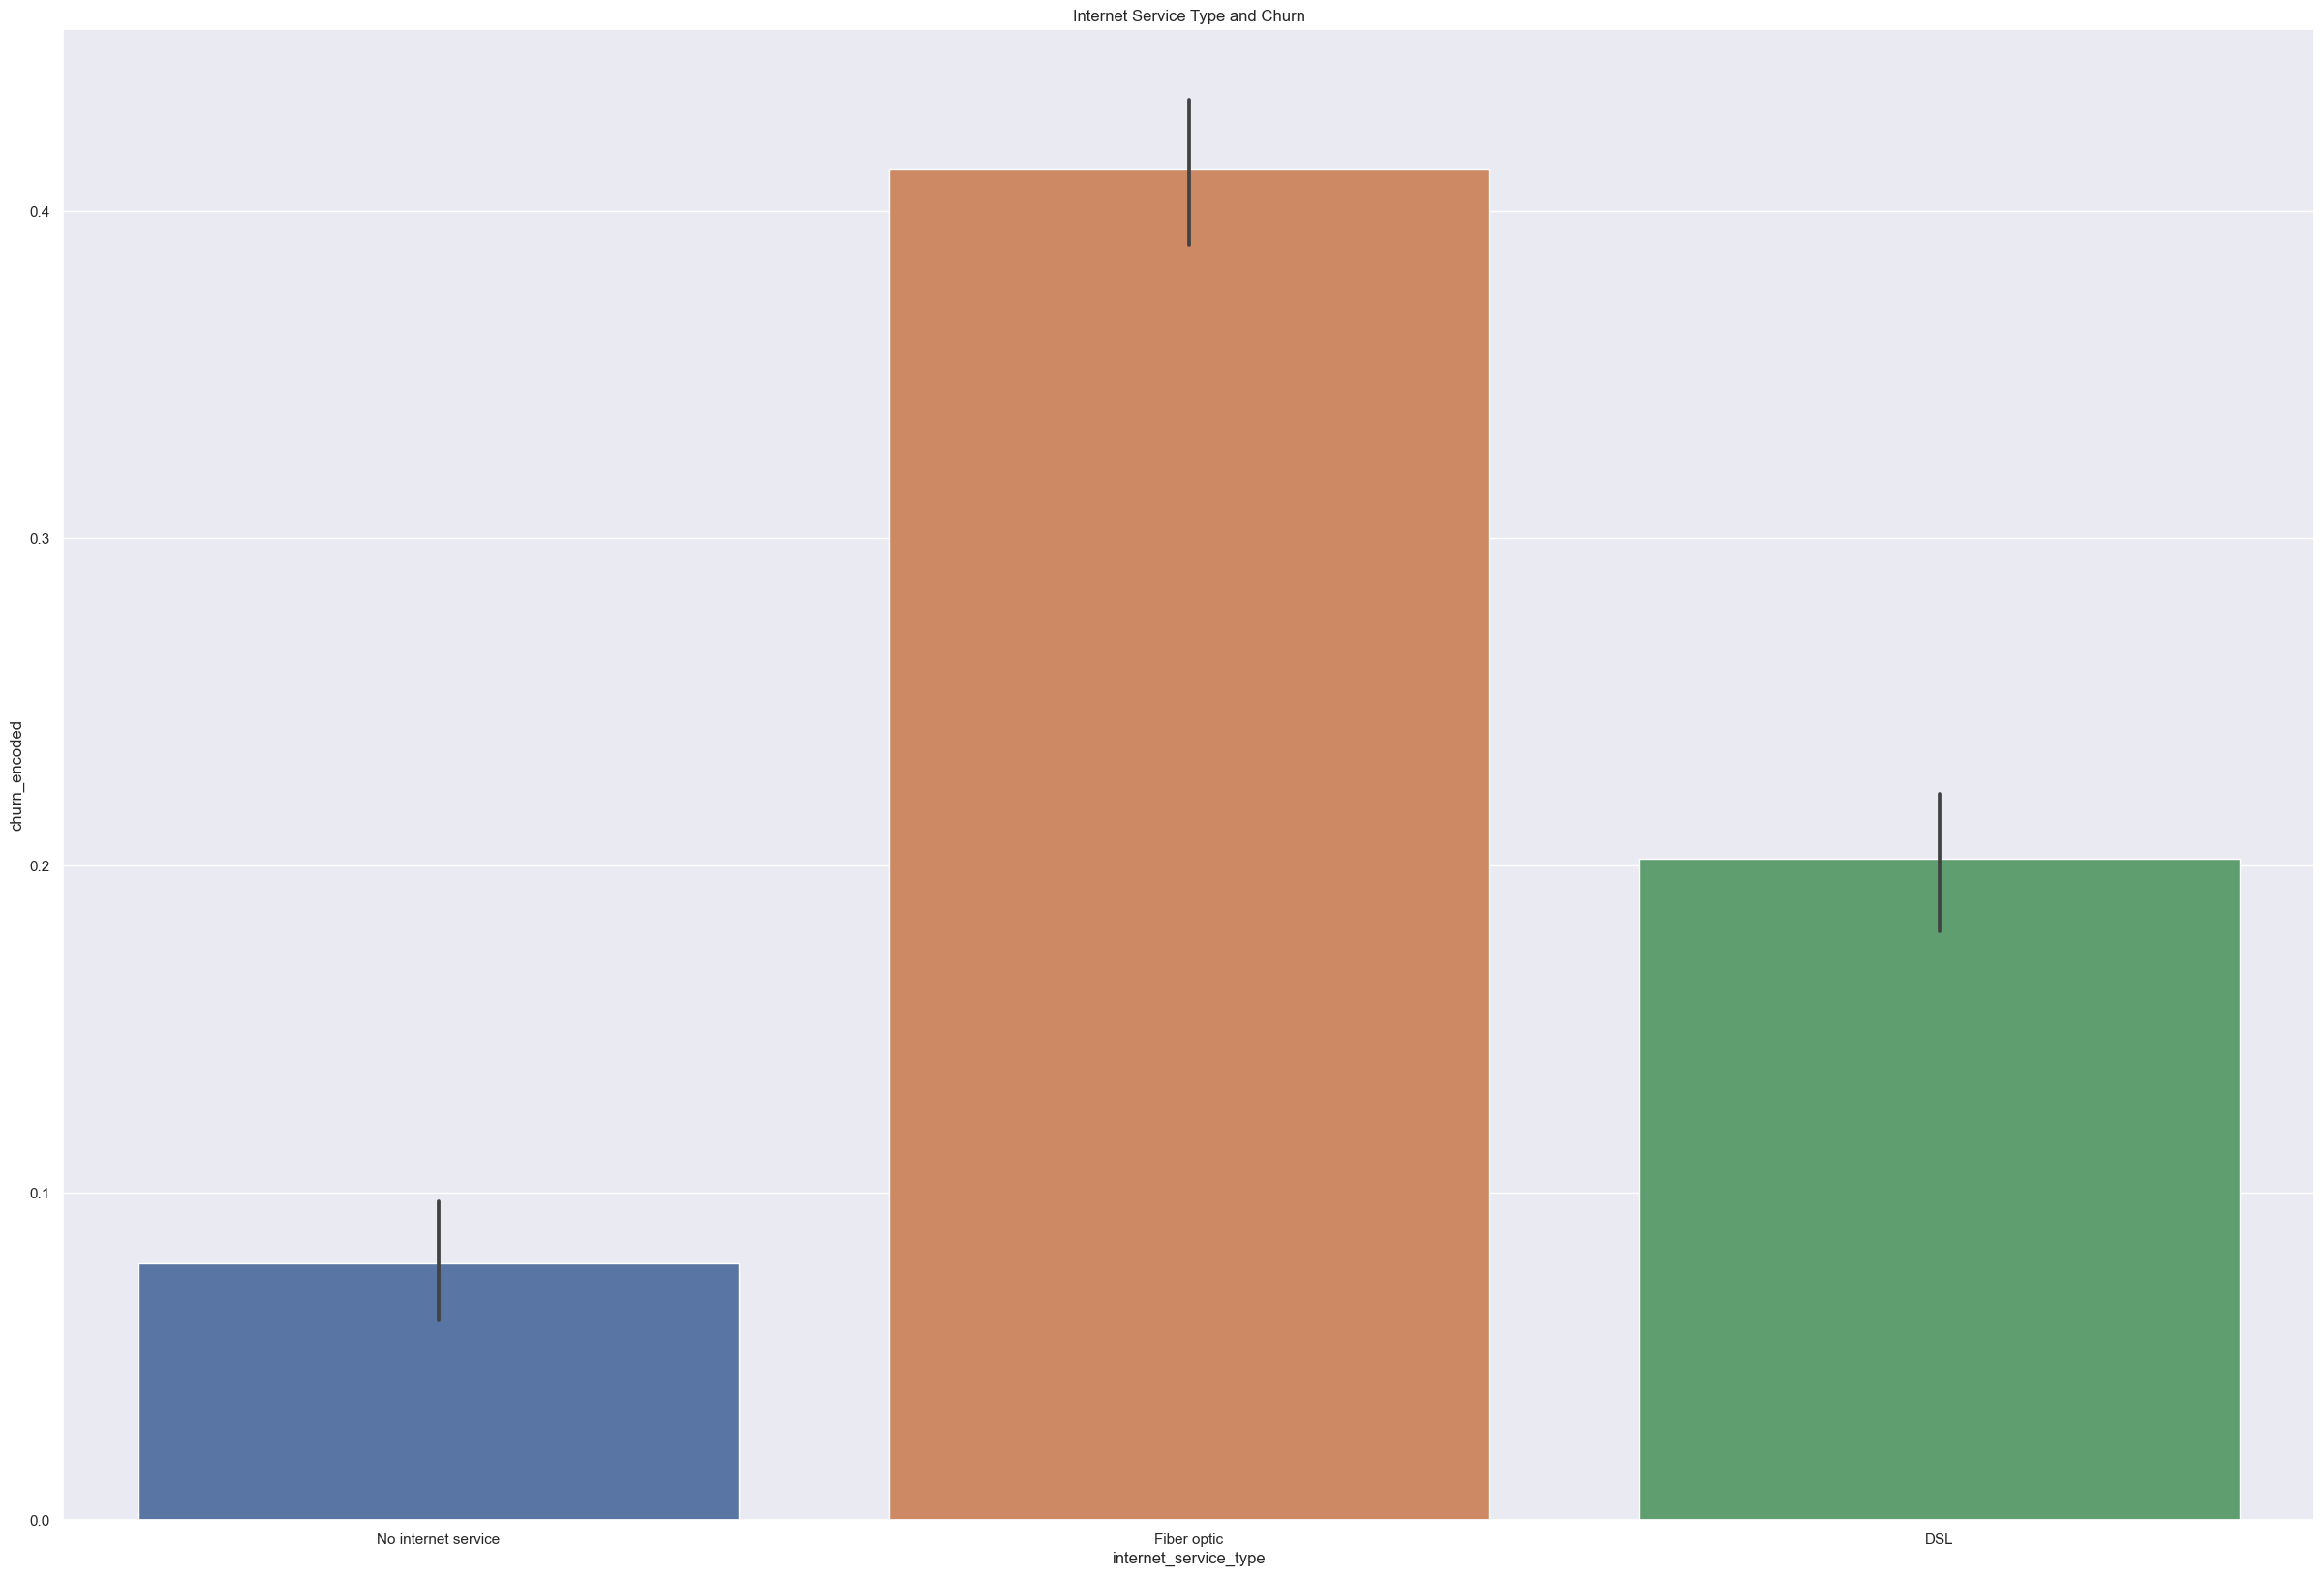

In [ ]:
# Are costomers with DSL more or less likly to churn? 

sns.barplot(x='internet_service_type', y='churn_encoded', data=train)
plt.title('Internet Service Type and Churn')
plt.show()


In [ ]:
print(f"Overall churn rate:", round(train.churn_encoded.mean(), 2))
print(f"Overall DSL churn rate", round(train[train.internet_service_type == 'DSL'].churn_encoded.mean(), 2))
print(f"Overall Fiber Optic churn rate", round(train[train.internet_service_type == 'Fiber optic'].churn_encoded.mean(), 2))
print(f"Overall No internet service churn rate", round(train[train.internet_service_type == 'No internet service'].churn_encoded.mean(), 2))


Overall churn rate: 0.27
Overall DSL churn rate 0.2
Overall Fiber Optic churn rate 0.41
Overall No internet service churn rate 0.08


In [ ]:
# not sure how to isolate one 

# categorial vs categorical so we use chi squared test

alpha = 0.05
null_hypothesis = "customers with DSL and churn are independent"
alternative_hypothesis = "there is a relationship between customers with DSL and churn"

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train.churn, train.internet_service_type == 'DSL')
observed

internet_service_type,False,True
churn,,
No,1805,1082
Yes,782,274


In [ ]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p

Reject the null hypothesis that customers with DSL and churn are independent
Sufficient evidence to move forward understanding that there is a relationship between customers with DSL and churn


1.9141181653098816e-11

- their does seem to be a ralationship however customers with DSL are less likly to leave than customers with fiber optic

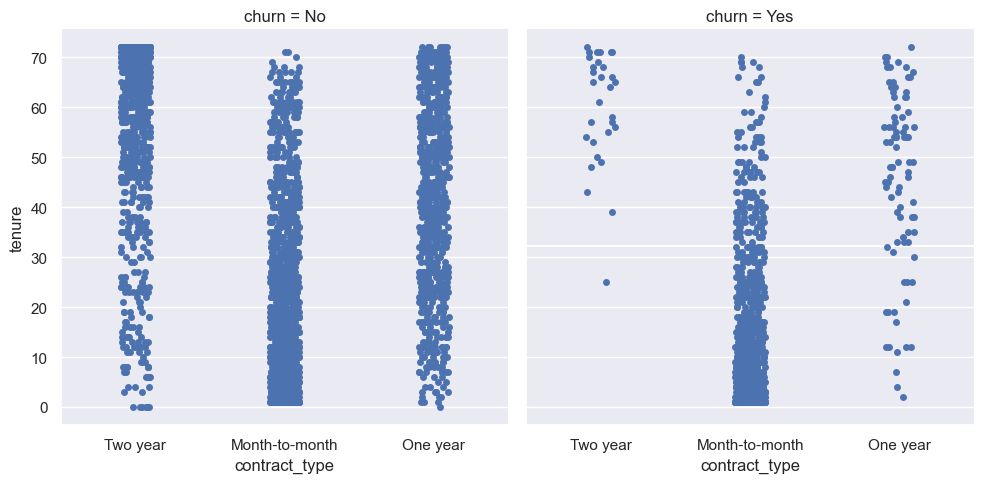

In [ ]:
# what month are customers likely to churn and does that depend on their contract type? 

# tenure, contract type, churn 

sns.catplot(x='contract_type', y='tenure', col='churn', data=train)
avg_tenure = train.tenure.mean()
plt.axhline(avg_tenure, label='Avg Tenure')
# plt.legend(loc='upper right')
plt.show()

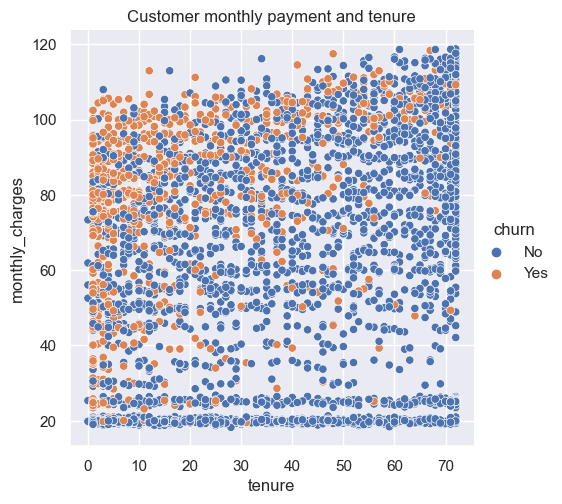

In [ ]:
sns.relplot(data=train, x='tenure', y='monthly_charges', hue='churn')
plt.title('Customer monthly payment and tenure')
plt.show()

In [ ]:
print(f"Overall churn rate:", round(train.churn_encoded.mean(), 2))
print(f"25 or less month tenure churn rate", round(train[train.tenure <= 25].churn_encoded.mean(), 2))
print(f"50 or less month churn rate", round(train[train.tenure <= 50].churn_encoded.mean(), 2))
print(f"100 or less month churn rate", round(train[train.tenure <= 100].churn_encoded.mean(), 2))

Overall churn rate: 0.27
25 or less month tenure churn rate 0.42
50 or less month churn rate 0.35
100 or less month churn rate 0.27


- most people tend to churn within the first 25 months
- is there a better way to narrow this down? 

In [ ]:
# not sure what they mean by what month? 

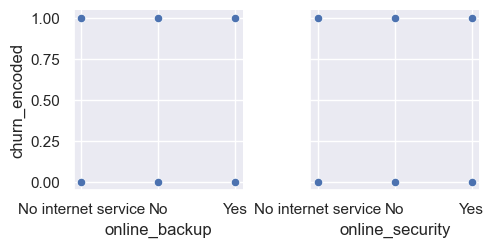

In [ ]:
sns.pairplot(train, x_vars=['online_backup', 'online_security'], y_vars=['churn_encoded'])

In [ ]:
from matplotlib import pyplot as plt

plt.style.use('seaborn')

plt.barplot


/var/folders/6d/_03p2v5j0rd067n1f34klb7w0000gn/T/ipykernel_2373/2437405160.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


AttributeError: module 'matplotlib.pyplot' has no attribute 'barplot'

/var/folders/6d/_03p2v5j0rd067n1f34klb7w0000gn/T/ipykernel_41711/3577096990.py:11: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


<Axes: xlabel='streaming_movies', ylabel='churn_encoded'>

<Figure size 5000x4000 with 0 Axes>

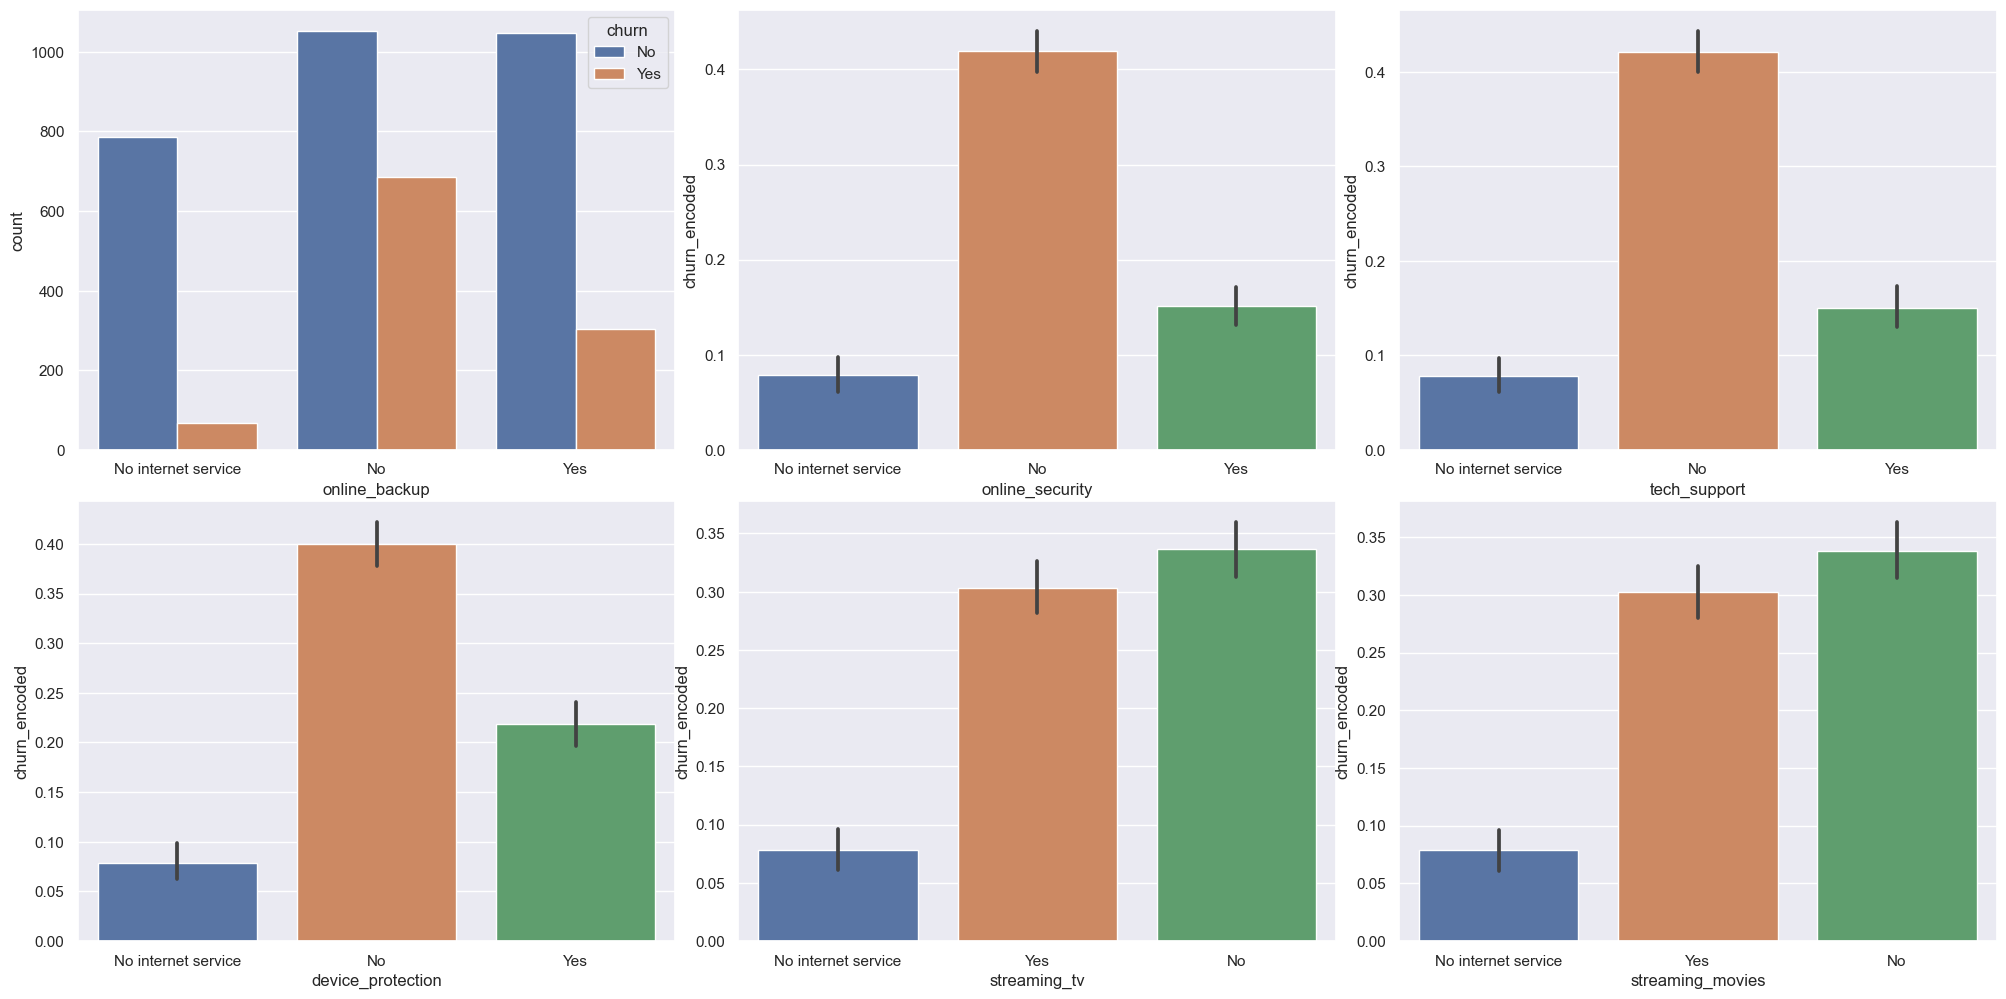

In [ ]:

#set seaborn plotting aesthetics as default
fig = plt.figure(figsize=(50, 40)) 
plt.rcParams['savefig.facecolor'] = "0.4"
plt.rcParams['figure.figsize'] = 20., 10.
plt.rcParams['figure.max_open_warning'] = 200

sns.set()

#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(nrows=2, ncols=3, layout="constrained")
fig.tight_layout()


#create boxplot in each subplot
sns.countplot(data=train, hue='churn', x='online_backup', ax=axes[0,0])
sns.barplot(data=train, y='churn_encoded', x='online_security', ax=axes[0,1])
sns.barplot(data=train, y='churn_encoded', x='tech_support', ax=axes[0,2])
sns.barplot(data=train, y='churn_encoded', x='device_protection', ax=axes[1,0])
sns.barplot(data=train, y='churn_encoded', x='streaming_tv', ax=axes[1,1])
sns.barplot(data=train, y='churn_encoded', x='streaming_movies', ax=axes[1,2])

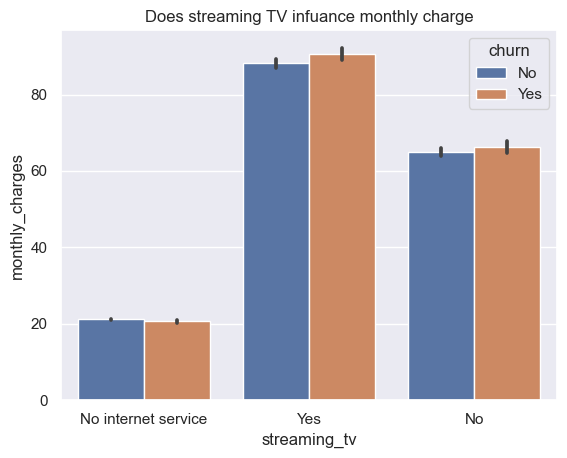

In [ ]:
sns.barplot(data=train, x='streaming_tv', y='monthly_charges', hue='churn')
plt.title('Does streaming TV infuance monthly charge')
plt.show()

In [ ]:
# monthly charges are numerical 
# streaming TV is categorical 



In [ ]:
# Null: Mean of monthly charges of churned customers <= Mean of monthly charges of all customers
# Alt: Mean of monthly charges of churned customers > Mean of monthly charges of all customers
alpha = .05


# an array of all observed values of the subgroup
churn_sample = train[train.churn == 'Yes'].monthly_charges

# the population mean
overall_mean = df.monthly_charges.mean()

t, p = stats.ttest_1samp(churn_sample, overall_mean)

print(t, p/2, alpha)



11.844260357576667 8.92393221260938e-31 0.05


In [ ]:
if p/2 > alpha:
    print("We fail to reject the null hypothesis.")
elif t < 0:
    print("We fail to reject null hypothesis.")
else:
    print("We reject the null hypothesis.")

We reject the null hypothesis.


<Axes: xlabel='payment_type', ylabel='churn_encoded'>

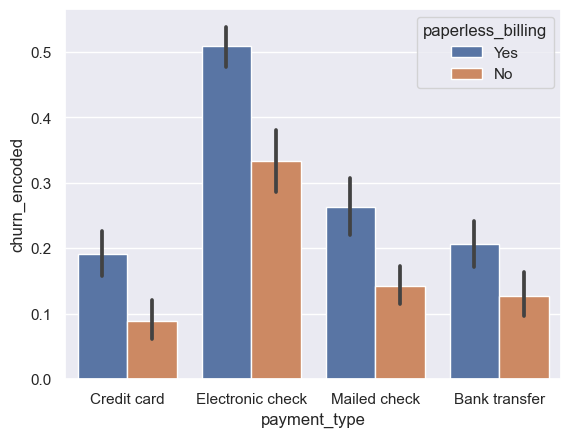

In [ ]:
sns.barplot(y='churn_encoded', x='payment_type', data=train, hue='paperless_billing')

<Axes: xlabel='multiple_lines', ylabel='phone_service_encoded'>

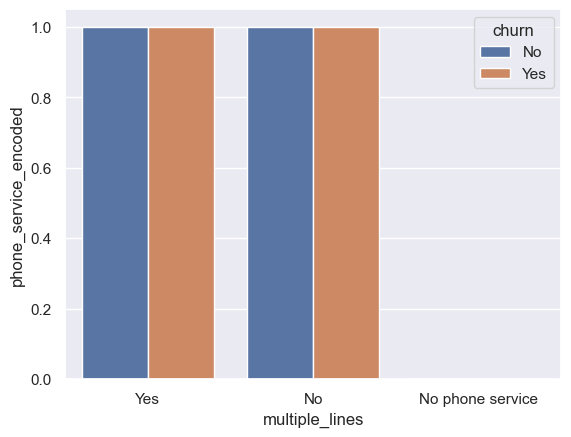

In [ ]:
sns.barplot(y='phone_service_encoded', x='multiple_lines', data=train, hue='churn')

In [ ]:
# not sure how to isolate one 

# categorial vs categorical so we use chi squared test

alpha = 0.05
null_hypothesis = "customers with phone service and churn are independent"
alternative_hypothesis = "there is a relationship between customers with phone service and churn"

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train.churn, train.phone_service == 'DSL')
observed

phone_service,False
churn,
No,2887
Yes,1056


In [ ]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p

Fail to reject the null
Insufficient evidence to reject the null


1.0

In [ ]:
null = "customers with phone service and churn are independent"
alt = "there is a relationship between customers with phone service and churn"

chi_squared(null, alt, train.churn, train.phone_service)

phone_service,No,Yes
churn,,
No,289,2598
Yes,99,957


Fail to reject the null
Insufficient evidence to reject the null
 
p = 0.5941763447086441


In [ ]:
train.phone_service.value_counts(), train.multiple_lines.value_counts()

(phone_service
 Yes    3555
 No      388
 Name: count, dtype: int64,
 multiple_lines
 No                  1872
 Yes                 1683
 No phone service     388
 Name: count, dtype: int64)

# this definately suprized me ^

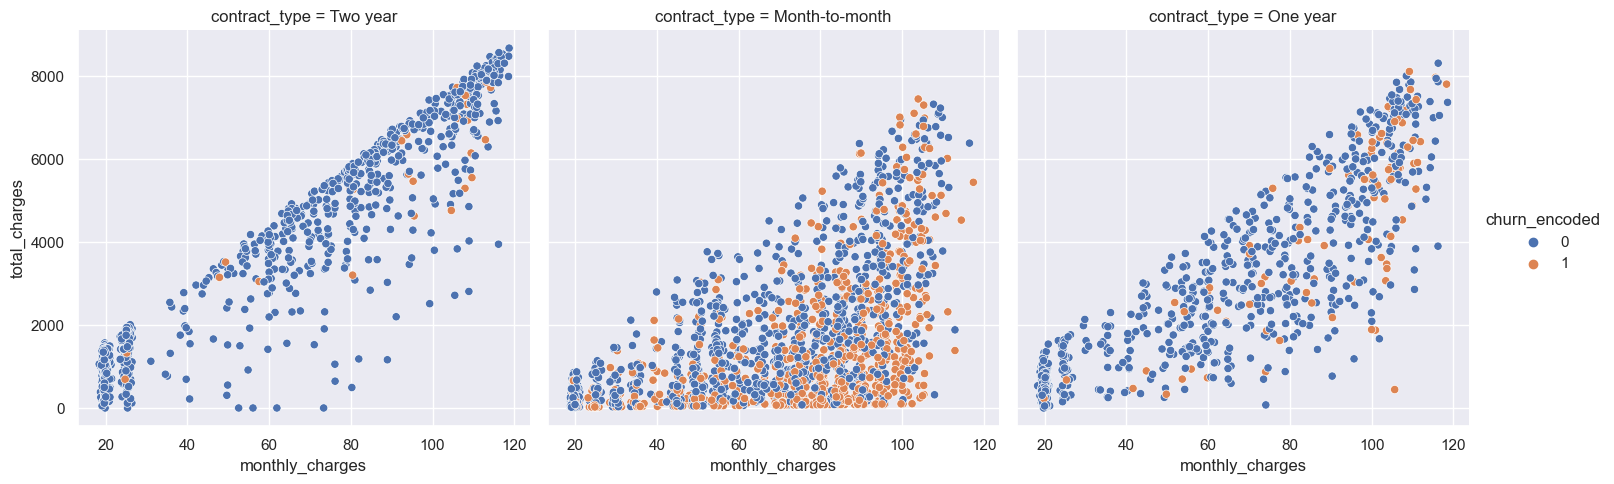

In [ ]:
sns.relplot(x='monthly_charges', y='total_charges', data=train, hue='churn_encoded', col='contract_type')

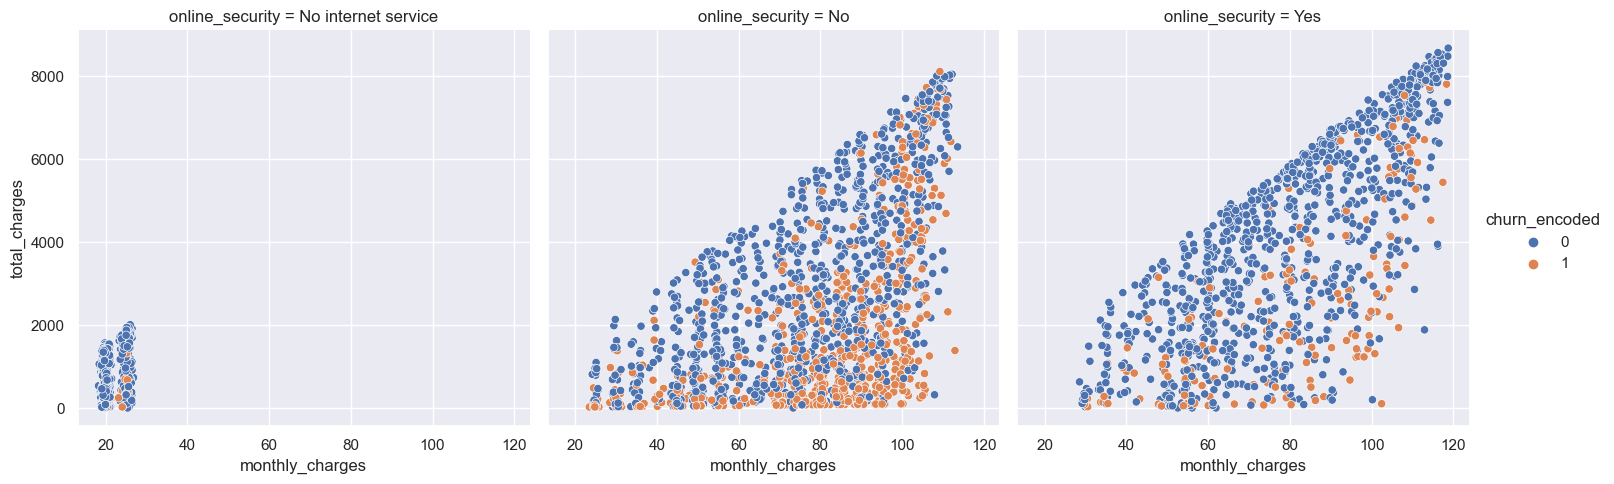

In [ ]:
sns.relplot(x='monthly_charges', y='total_charges', data=train, hue='churn_encoded', col='online_security')

In [ ]:
# is there a service that is accodiated with more churn than expected? 

In [ ]:
# Does having both phone and internet make customers more likly to churn?  

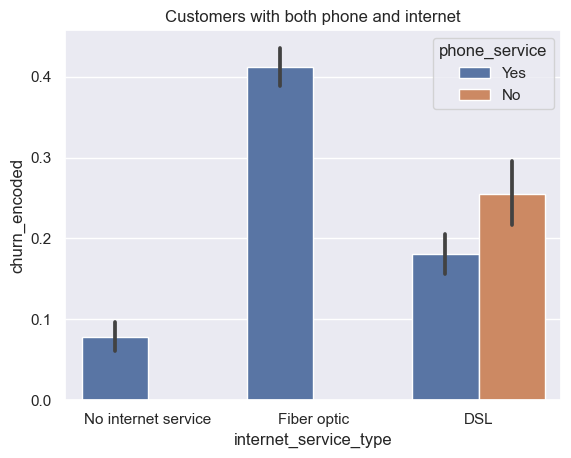

In [ ]:
sns.barplot(x='internet_service_type', y='churn_encoded', data=train, hue='phone_service')
plt.title('Customers with both phone and internet')
plt.show()

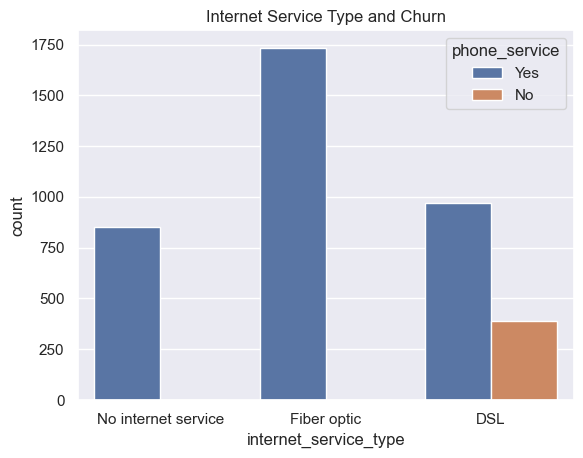

In [ ]:
sns.countplot(x='internet_service_type', data=train, hue='phone_service')
plt.title('Internet Service Type and Churn')
plt.show()


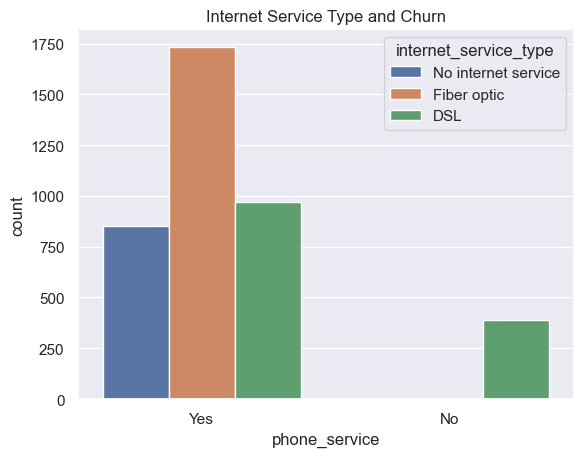

In [ ]:
sns.countplot(hue='internet_service_type', data=train, x='phone_service')
plt.title('Internet Service Type and Churn')
plt.show()

# feature that I am moving on with to modeling:
- Contract type (found that customers with month to month contract types are most likely to leave)
- Monthy Charges
- Total Charges 
- Senior citizen 

In [ ]:
# baseline
baseline_prediction = train.churn_encoded.mode()

baseline_accuracy = (train.churn_encoded == 0).mean()

print(f'Baseline prediction -> {baseline_prediction}')

print(f'Baseline accuracy -> { baseline_accuracy}')

Baseline prediction -> 0    0
Name: churn_encoded, dtype: int64
Baseline accuracy -> 0.7321836165356328


# baseline to beat ^ 

In [ ]:
lables = sorted(y_train.unique())
lables
y_train.unique()

array([0, 1])

In [ ]:
def get_metrics(model,xtrain,ytrain,xtest,ytest) -> str:
    
    labels = sorted(y_train.unique()) # orders the array of the target variable 

    # OUTPUTS AN ARRAY OF PREDICTIONS
    preds = model.predict(xtest)
    print("Accuracy Score:", model.score(xtest,ytest))
    print()
    print('Confusion Matrix:')
    conf = confusion_matrix(ytest,preds)
    TP = conf[0, 0]
    TN = conf[1, 1]
    FP = conf[0, 1]
    FN = conf[1, 0]
    conf = pd.DataFrame(conf,
            index=[str(label) + '_actual'for label in labels],
            columns=[str(label) + '_predict'for label in labels])
    print(conf)
    print('')
    print(f'True Positive -> {TP}')
    print(f'True Negative -> {TN}')
    print(f'False Positive -> {FP}')
    print(f'False Negative -> {FN}')
    print()
    print("Classification Report:")
    print(classification_report(ytest, preds))

In [ ]:
train.head().T

,2198,2613,5714,173,3218
customer_id,3148-AOIQT,3722-WPXTK,8049-WJCLQ,0278-YXOOG,4615-PIVVU
gender,Female,Male,Male,Male,Female
senior_citizen,0,0,0,0,0
partner,Yes,No,Yes,No,No
dependents,No,No,Yes,No,No
tenure,69,1,10,5,42
phone_service,Yes,Yes,Yes,Yes,Yes
multiple_lines,Yes,No,No,No,No
online_security,No internet service,No,No,No internet service,No
online_backup,No internet service,No,No,No internet service,No


In [ ]:
train.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type', 'gender_encoded', 'partner_encoded',
       'dependents_encoded', 'phone_service_encoded',
       'paperless_billing_encoded', 'churn_encoded',
       'multiple_lines_No phone service', 'multiple_lines_Yes',
       'online_security_No internet service', 'online_security_Yes',
       'online_backup_No internet service', 'online_backup_Yes',
       'device_protection_No internet service', 'device_protection_Yes',
       'tech_support_No internet service', 'tech_support_Yes',
       'streaming_tv_No internet service', 'streaming_tv_Yes',
       'streaming_movies_No internet service', 'streaming_movies_Yes',


In [ ]:
telco_drop = ['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents', 'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'churn_encoded', 'contract_type', 'internet_service_type', 'payment_type', 'gender_encoded', 'phone_service_encoded',
       'multiple_lines_No phone service', 'multiple_lines_Yes']

telco_keep = ['partner_encoded', 'dependents_encoded','paperless_billing_encoded', 'online_security_No internet service', 'online_security_Yes', 
       'online_backup_No internet service', 'online_backup_Yes', 'device_protection_No internet service', 'device_protection_Yes', 
       'tech_support_No internet service', 'tech_support_Yes', 'streaming_tv_No internet service', 'streaming_tv_Yes', 
       'streaming_movies_No internet service', 'streaming_movies_Yes', 'contract_type_One year', 'contract_type_Two year', 
       'internet_service_type_Fiber optic', 'internet_service_type_No internet service',
       'payment_type_Credit card (automatic)', 'payment_type_Electronic check', 'payment_type_Mailed check']

In [ ]:
# SPLIT DATA INTO X AND Y DATA SETS
# this will allow us to separate the target variable and the features 

X_train = train.drop(columns=telco_drop) # all the features, will NOT contain the target variable 

X_validate = validate.drop(columns=telco_drop) # same as above 

X_test = test.drop(columns=telco_drop) # same as above 

y_train = train.churn_encoded # will only contain the target variable 

y_validate = validate.churn_encoded # same as above 

y_test = test.churn_encoded # same as above 

In [ ]:
def dis_tree(train_X, validate_X, train_y, validate_y):
    '''get decision tree accuracy on train and validate data'''

    # create classifier object
    clf = DecisionTreeClassifier(max_depth=3, random_state=123)

    #fit model on training data
    clf = clf.fit(train_X, train_y)

    # print result
    print(f"Accuracy of Decision Tree on train data is {clf.score(train_X, train_y)}")
    print(f"Accuracy of Decision Tree on validate data is {clf.score(validate_X, validate_y)}")



In [ ]:
# for classification you can change the algorithm to gini or entropy (information gain).  
# Default is gini.

clf = DecisionTreeClassifier(max_depth=3, random_state=123)
clf


DecisionTreeClassifier(max_depth=3, random_state=123)

In [ ]:
# model.fit(X, y)

clf = clf.fit(X_train, y_train)


In [ ]:
get_metrics(clf,X_train,y_train,X_test,y_test)

Accuracy Score: 0.7700496806245565

Confusion Matrix:
          0_predict  1_predict
0_actual        886        149
1_actual        175        199

True Positive -> 886
True Negative -> 199
False Positive -> 149
False Negative -> 175

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1035
           1       0.57      0.53      0.55       374

    accuracy                           0.77      1409
   macro avg       0.70      0.69      0.70      1409
weighted avg       0.77      0.77      0.77      1409



In [ ]:
def compute_metrics(TN,FP,FN,TP):
    all_ = (TP + TN + FP + FN)

    accuracy = (TP + TN) / all_

    TPR = recall = TP / (TP + FN)
    FPR = FP / (FP + TN)

    TNR = TN / (FP + TN)
    FNR = FN / (FN + TP)

    precision =  TP / (TP + FP)
    f1 =  2 * ((precision * recall) / ( precision + recall))

    support_pos = TP + FN
    support_neg = FP + TN

    print(f"Accuracy: {accuracy}\n")
    print(f"True Positive Rate/Sensitivity/Recall/Power: {TPR}")
    print(f"False Positive Rate/False Alarm Ratio/Fall-out: {FPR}")
    print(f"True Negative Rate/Specificity/Selectivity: {TNR}")
    print(f"False Negative Rate/Miss Rate: {FNR}\n")
    print(f"Precision/PPV: {precision}")
    print(f"F1 Score: {f1}\n")
    print(f"Support (0): {support_pos}")
    print(f"Support (1): {support_neg}")

In [ ]:
TP = 886
TN = 199
FP = 149
FN = 175

In [ ]:
compute_metrics(TN, FP, FN, TP)

Accuracy: 0.7700496806245565

True Positive Rate/Sensitivity/Recall/Power: 0.8350612629594723
False Positive Rate/False Alarm Ratio/Fall-out: 0.4281609195402299
True Negative Rate/Specificity/Selectivity: 0.5718390804597702
False Negative Rate/Miss Rate: 0.1649387370405278

Precision/PPV: 0.8560386473429952
F1 Score: 0.8454198473282443

Support (0): 1061
Support (1): 348


In [ ]:
dis_tree(X_train, X_validate, y_train, y_validate)
    

Accuracy of Decision Tree on train data is 0.7522191224955618
Accuracy of Decision Tree on validate data is 0.745712596096984


In [ ]:
#for many
for x in range(1,20):
#     print(x)
    clf = DecisionTreeClassifier(max_depth=x, random_state=123)
    clf.fit(X_train, y_train)
    acc = clf.score(X_train, y_train)
    print(f'for depth of {x:2}, the accuracy is {round(acc,2)}')

for depth of  1, the accuracy is 0.73
for depth of  2, the accuracy is 0.73
for depth of  3, the accuracy is 0.75
for depth of  4, the accuracy is 0.77
for depth of  5, the accuracy is 0.77
for depth of  6, the accuracy is 0.78
for depth of  7, the accuracy is 0.79
for depth of  8, the accuracy is 0.8
for depth of  9, the accuracy is 0.81
for depth of 10, the accuracy is 0.82
for depth of 11, the accuracy is 0.84
for depth of 12, the accuracy is 0.85
for depth of 13, the accuracy is 0.87
for depth of 14, the accuracy is 0.87
for depth of 15, the accuracy is 0.87
for depth of 16, the accuracy is 0.88
for depth of 17, the accuracy is 0.88
for depth of 18, the accuracy is 0.88
for depth of 19, the accuracy is 0.88


In [ ]:
scores_all = []

for x in range(1,20):

    clf = DecisionTreeClassifier(max_depth=x, random_state=7)
    clf.fit(X_train, y_train)
    
    # evaluate on train
    train_acc = clf.score(X_train, y_train)
    
    #evaluate on validate
    val_acc = clf.score(X_validate, y_validate)
    
    scores_all.append([x, train_acc, val_acc])
    
scores_df = pd.DataFrame(scores_all, columns=['max_depth','train_acc','val_acc'])
scores_df = pd.DataFrame(scores_all, columns=['max_depth','train_acc','val_acc'])
scores_df.sort_values(by=['val_acc'], ascending=False).head()

,max_depth,train_acc,val_acc
4,5,0.772762,0.776464
3,4,0.766675,0.772915
6,7,0.786203,0.770550
5,6,0.779863,0.765228
7,8,0.797616,0.756949


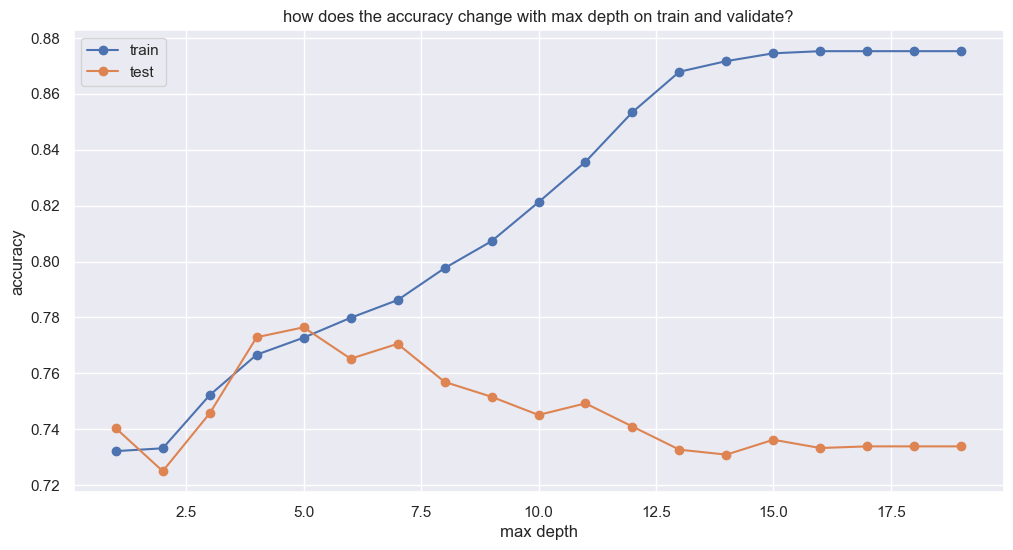

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(scores_df.max_depth, scores_df.train_acc, label='train', marker='o')
plt.plot(scores_df.max_depth, scores_df.val_acc, label='test', marker='o')
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.title('how does the accuracy change with max depth on train and validate?')
plt.legend()
plt.show()

# decision tree ^

In [ ]:
rf = RandomForestClassifier(random_state=123, min_samples_leaf=1, max_depth=10)
rf

RandomForestClassifier(max_depth=10, random_state=123)

In [ ]:
#fit the object
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [ ]:
get_metrics(rf,X_train,y_train,X_test,y_test)

Accuracy Score: 0.7792760823278921

Confusion Matrix:
          0_predict  1_predict
0_actual        917        118
1_actual        193        181

True Positive -> 917
True Negative -> 181
False Positive -> 118
False Negative -> 193

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.61      0.48      0.54       374

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.70      1409
weighted avg       0.77      0.78      0.77      1409



In [ ]:
TP = 917
TN = 181
FP = 118
FN = 193

In [ ]:
compute_metrics(TN, FP, FN, TP)

Accuracy: 0.7792760823278921

True Positive Rate/Sensitivity/Recall/Power: 0.8261261261261261
False Positive Rate/False Alarm Ratio/Fall-out: 0.39464882943143814
True Negative Rate/Specificity/Selectivity: 0.6053511705685619
False Negative Rate/Miss Rate: 0.17387387387387387

Precision/PPV: 0.8859903381642512
F1 Score: 0.855011655011655

Support (0): 1110
Support (1): 299


In [ ]:
import csv

scores_all = []

for x in range(1,11):
    
    # looping through min_samples_leaf front to back 
    # looping through max_depth back to front
    rf = RandomForestClassifier(random_state=123, min_samples_leaf=x, max_depth=11-x) # different if x = 10 vs x = 1
    #fit it
    rf.fit(X_train, y_train)
    #transform it
    train_acc = rf.score(X_train, y_train)
    
    #evaluate on my validate data
    val_acc = rf.score(X_validate, y_validate)
    
    print(f'min_samples_leaf = {x} max_depth = {11-x}, accuracy = {train_acc, val_acc}')
    
    scores_all.append([x, 11-x, train_acc, val_acc])

scores_df = pd.DataFrame(scores_all, columns=['min_sample_leaf', 'max_depth','train_acc','val_acc'])
scores_df = pd.DataFrame(scores_all, columns=['min_sample_leaf', 'max_depth','train_acc','val_acc'])
scores_df.sort_values(by=['val_acc'], ascending=False).head()

with open('profiles1.csv', 'w', newline='') as file:
    writer = csv.writer(scores_df)
    field = ["predictions"]
    
    writer.writerow(field)
    writer.writerow(["Oladele Damilola", "40", "Nigeria"])
    

min_samples_leaf = 1 max_depth = 10, accuracy = (0.8255135683489728, 0.7829686575990538)
min_samples_leaf = 2 max_depth = 9, accuracy = (0.8004057823991885, 0.7806031933767001)
min_samples_leaf = 3 max_depth = 8, accuracy = (0.7884859244230281, 0.7806031933767001)
min_samples_leaf = 4 max_depth = 7, accuracy = (0.7851889424296221, 0.7829686575990538)
min_samples_leaf = 5 max_depth = 6, accuracy = (0.7803702764392595, 0.7794204612655233)
min_samples_leaf = 6 max_depth = 5, accuracy = (0.77859497844281, 0.781785925487877)
min_samples_leaf = 7 max_depth = 4, accuracy = (0.7760588384478824, 0.7764636309875813)
min_samples_leaf = 8 max_depth = 3, accuracy = (0.7321836165356328, 0.7403903015966884)
min_samples_leaf = 9 max_depth = 2, accuracy = (0.7321836165356328, 0.7403903015966884)
min_samples_leaf = 10 max_depth = 1, accuracy = (0.7321836165356328, 0.7403903015966884)


TypeError: argument 1 must have a "write" method

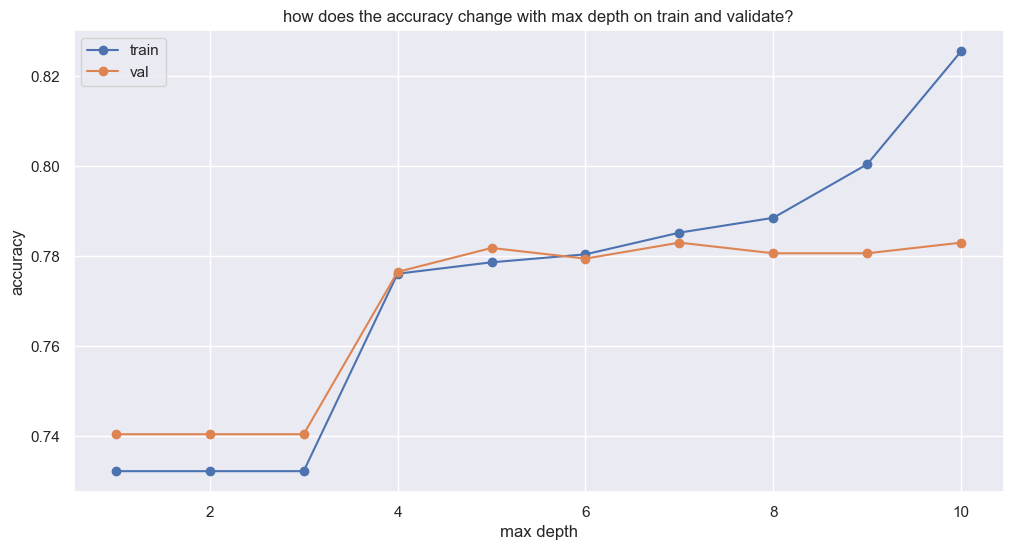

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(scores_df.max_depth, scores_df.train_acc, label='train', marker='o')
plt.plot(scores_df.max_depth, scores_df.val_acc, label='val', marker='o')
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.title('how does the accuracy change with max depth on train and validate?')
plt.legend()
plt.show()

# Random forest ^ 

In [ ]:
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

In [ ]:
knn = knn.fit(X_train, y_train)
knn

KNeighborsClassifier()

In [ ]:
y_preds = knn.predict(X_train)
y_preds

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.81


In [ ]:
confusion_matrix(y_train, y_preds)

array([[2552,  335],
       [ 395,  661]])

In [ ]:
print(classification_report(y_train, y_preds))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      2887
           1       0.66      0.63      0.64      1056

    accuracy                           0.81      3943
   macro avg       0.76      0.75      0.76      3943
weighted avg       0.81      0.81      0.81      3943



In [ ]:
#another way
confu = confusion_matrix(y_train,knn.predict(X_train))
TN = confu[0][0]
FP = confu[0][1]
FN = confu[1][0]
TP = confu[1][1]


In [ ]:
compute_metrics(TN, FP, FN, TP)

Accuracy: 0.8148617803702765

True Positive Rate/Sensitivity/Recall/Power: 0.6259469696969697
False Positive Rate/False Alarm Ratio/Fall-out: 0.11603740907516454
True Negative Rate/Specificity/Selectivity: 0.8839625909248354
False Negative Rate/Miss Rate: 0.3740530303030303

Precision/PPV: 0.6636546184738956
F1 Score: 0.6442495126705653

Support (0): 1056
Support (1): 2887


In [ ]:
pred_dict = {
    'model': [],
    'accuracy': [],
    'true_positive_rate': [],
    'false_positive_rate': [],
    'true_negative_rate': [],
    'false_negative_rate': [],
    'precision': [],
    'recall': [],
    'f1_score': [],
    'support_0': [],
    'support_1': []
}

for n in [5, 10, 20]:
    knn = KNeighborsClassifier(n_neighbors=n)
    
    knn.fit(X_train, y_train)
    
    y_preds = knn.predict(X_train)
    
    TN, FP, FN, TP = confusion_matrix(y_train, y_preds).ravel()
    ALL = TP + TN + FP + FN
    
    accuracy = (TP + TN)/ALL
    true_positive_rate = TP/(TP+FN)
    false_positive_rate = FP/(FP+TN)
    true_negative_rate = TN/(TN+FP)
    false_negative_rate = FN/(FN+TP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    f1_score = 2*(precision*recall)/(precision+recall)
    support_pos = TP + FN
    support_neg = FP + TN
    
    pred_dict['model'].append(f'knn_n_{n}')
    pred_dict['accuracy'].append(accuracy)
    pred_dict['true_positive_rate'].append(true_positive_rate)
    pred_dict['false_positive_rate'].append(false_positive_rate)
    pred_dict['true_negative_rate'].append(true_negative_rate)
    pred_dict['false_negative_rate'].append(false_negative_rate)
    pred_dict['precision'].append(precision)
    pred_dict['recall'].append(recall)
    pred_dict['f1_score'].append(f1_score)
    pred_dict['support_0'].append(support_pos)
    pred_dict['support_1'].append(support_neg)

In [ ]:
scores_all = []

for x in range(1,10):

    knn = KNeighborsClassifier(n_neighbors=x)
    knn.fit(X_train, y_train)
    
    # evaluate on train
    train_acc = knn.score(X_train, y_train)
    
    #evaluate on validate
    val_acc = knn.score(X_validate, y_validate)
    
    scores_all.append([x, train_acc, val_acc])
    
scores_df = pd.DataFrame(scores_all, columns=['max_depth','train_acc','val_acc'])
scores_df = pd.DataFrame(scores_all, columns=['max_depth','train_acc','val_acc'])
scores_df.sort_values(by=['val_acc'], ascending=False).head()

,max_depth,train_acc,val_acc
3,4,0.809536,0.764636
5,6,0.809029,0.756949
8,9,0.800659,0.756949
4,5,0.814862,0.753400
6,7,0.803196,0.749852


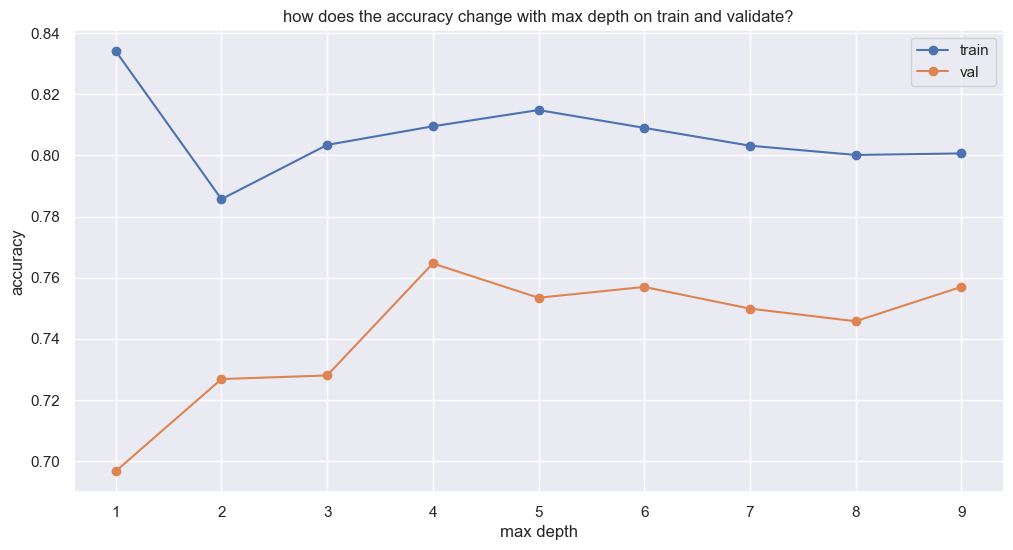

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(scores_df.max_depth, scores_df.train_acc, label='train', marker='o')
plt.plot(scores_df.max_depth, scores_df.val_acc, label='val', marker='o')
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.title('how does the accuracy change with max depth on train and validate?')
plt.legend()
plt.show()

In [ ]:
pd.DataFrame(pred_dict)

,model,accuracy,true_positive_rate,false_positive_rate,true_negative_rate,false_negative_rate,precision,recall,f1_score,support_0,support_1
0,knn_n_5,0.819680,0.632576,0.111881,0.888119,0.367424,0.674067,0.632576,0.652662,1056,2887
1,knn_n_10,0.798630,0.510417,0.095947,0.904053,0.489583,0.660539,0.510417,0.575855,1056,2887
2,knn_n_20,0.790261,0.539773,0.118116,0.881884,0.460227,0.625686,0.539773,0.579563,1056,2887


# k nearest neighbors ^ 

In [ ]:
telco_keep = ['partner_encoded', 'dependents_encoded','paperless_billing_encoded', 'online_security_No internet service', 'online_security_Yes', 
       'online_backup_No internet service', 'online_backup_Yes', 'device_protection_No internet service', 'device_protection_Yes', 
       'tech_support_No internet service', 'tech_support_Yes', 'streaming_tv_No internet service', 'streaming_tv_Yes', 
       'streaming_movies_No internet service', 'streaming_movies_Yes', 'contract_type_One year', 'contract_type_Two year', 
       'internet_service_type_Fiber optic', 'internet_service_type_No internet service',
       'payment_type_Credit card (automatic)', 'payment_type_Electronic check', 'payment_type_Mailed check']

In [ ]:
account_info

['tenure',
 'contract_type',
 'paperless_billing',
 'payment_method',
 'monthly_charges']

In [ ]:
logit = LogisticRegression(C=1, random_state=123)

In [ ]:
logit.fit(X_train, y_train)


LogisticRegression(C=1, random_state=123)

In [ ]:
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)


Coefficient: 
 [[ 0.10802581 -0.22678991 -0.15023543 -0.12953566  0.29482906  0.12796731
   0.06751785 -0.14030483 -0.52737617 -0.14030483 -0.2521075  -0.14030483
  -0.25480577 -0.14030483 -0.49246775 -0.14030483  0.26036718 -0.14030483
   0.15833801 -1.22702098 -2.0664776   0.6099767  -0.14030483 -0.14463955
   0.48335119  0.1384214 ]]
Intercept: 
 [-0.67986174]


In [ ]:
# now use the model to make predictions
y_pred = logit.predict(X_train)


In [ ]:
y_pred_proba = logit.predict_proba(X_train)


In [ ]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))


Accuracy of Logistic Regression classifier on training set: 0.78


In [ ]:
print(confusion_matrix(y_train, y_pred))


[[2555  332]
 [ 528  528]]


In [ ]:
print(classification_report(y_train, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.89      0.86      2887
           1       0.61      0.50      0.55      1056

    accuracy                           0.78      3943
   macro avg       0.72      0.69      0.70      3943
weighted avg       0.77      0.78      0.77      3943



## model 2

In [ ]:
# Change hyperparameter C = 0.01

logit2 = LogisticRegression(C=.01 ,random_state=123)

In [ ]:
# fit the model
logit2.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=123)

In [ ]:
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[ 0.10802581 -0.22678991 -0.15023543 -0.12953566  0.29482906  0.12796731
   0.06751785 -0.14030483 -0.52737617 -0.14030483 -0.2521075  -0.14030483
  -0.25480577 -0.14030483 -0.49246775 -0.14030483  0.26036718 -0.14030483
   0.15833801 -1.22702098 -2.0664776   0.6099767  -0.14030483 -0.14463955
   0.48335119  0.1384214 ]]
Intercept: 
 [-0.67986174]


In [ ]:
# make prediction
y_pred2 = logit2.predict(X_train)

In [ ]:
y_pred_proba2 = logit2.predict_proba(X_train)


In [ ]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit2.score(X_train, y_train)))


Accuracy of Logistic Regression classifier on training set: 0.78


In [ ]:
print(confusion_matrix(y_train, y_pred2))


[[2702  185]
 [ 701  355]]


In [ ]:
print(classification_report(y_train, y_pred2))


              precision    recall  f1-score   support

           0       0.79      0.94      0.86      2887
           1       0.66      0.34      0.44      1056

    accuracy                           0.78      3943
   macro avg       0.73      0.64      0.65      3943
weighted avg       0.76      0.78      0.75      3943



In [ ]:
# make predictions

y_pred1 = logit.predict(X_validate)
y_pred2 = logit2.predict(X_validate)


print("Model 1: c = 1")

# accuracy of model 1
print('Accuracy: {:.2f}'.format(logit.score(X_validate, y_validate)))

# confusion matrix of model 1
print(confusion_matrix(y_validate, y_pred1))

# classification report of model 1
print(classification_report(y_validate, y_pred1))

print("Model 2: c = .1")

# accuracy of model 2
print('Accuracy: {:.2f}'.format(logit2.score(X_validate, y_validate)))

# confusion matrix of model 2
print(confusion_matrix(y_validate, y_pred2))

# classification report of model 2
print(classification_report(y_validate, y_pred2))


Model 1: c = 1
Accuracy: 0.80
[[1114  138]
 [ 207  232]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1252
           1       0.63      0.53      0.57       439

    accuracy                           0.80      1691
   macro avg       0.74      0.71      0.72      1691
weighted avg       0.79      0.80      0.79      1691

Model 2: c = .1
Accuracy: 0.79
[[1175   77]
 [ 278  161]]
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1252
           1       0.68      0.37      0.48       439

    accuracy                           0.79      1691
   macro avg       0.74      0.65      0.67      1691
weighted avg       0.77      0.79      0.77      1691



In [ ]:
y_pred = logit.predict(X_test)
y_pred_proba = logit.predict_proba(X_test)

print("Model 1: c = 1")

print('Accuracy: {:.2f}'.format(logit.score(X_test, y_test)))

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))


Model 1: c = 1
Accuracy: 0.80
[[923 112]
 [174 200]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.64      0.53      0.58       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [ ]:
# create array of probabilities of being versicolor (versicolor == 1)

y_pred_proba = np.array([i[1] for i in y_pred_proba])


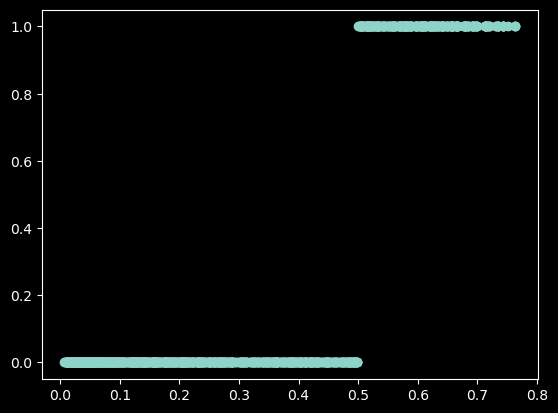

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# scatter plot where x is the probabilities and y is the class (0, 1)
ax.scatter(y_pred_proba, y_pred)


# Logistic regression ^ 

In [ ]:
TP = 1,1
FP = 1,0
FN = 0,1
TN = 0,0

In [ ]:
2/3

0.6666666666666666

In [ ]:
0/1

0.0

In [ ]:
df = pd.DataFrame({
    'has_churned': [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    'base': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
})
df


,has_churned,base
0,1,0
1,1,0
2,0,0
3,0,0
4,1,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [ ]:
pd.crosstab(df.has_churned, df.base)

base,0
has_churned,
0,8
1,3


In [ ]:
8/12

0.6666666666666666

In [ ]:
confusion_matrix(df.has_churned, df.base,
                 labels = ('has_churned', 'base'))

ValueError: At least one label specified must be in y_true